In [ ]:
import pandas as pd
from IPython.display import display

# Set the path of file
data_file_path = './data/stock_market_data/nyse/csv/AAP.csv'  
  
# Load the dataset
data = pd.read_csv(data_file_path)

print("\nDataset (First 10 rows):")
display(data.head(10))


In [ ]:
# Check if there's any missing data in the datasets
print("Missing values in Data:")
print(data.isnull().sum())

print(data.dtypes)
print(data.info())



In [55]:
def remove_outliers_in_adjusted_close(data, threshold=3):
    # Find the adjustment factor between "Close" and "Adjusted Close" data
    data['Adjustment Factor'] = data['Adjusted Close'] / data['Close']
    
    # Calculate the mean and standard deviation of adjustment factor
    mean_factor = data['Adjustment Factor'].mean()
    std_factor = data['Adjustment Factor'].std()
    
    # Caculate z-score
    data['z_score'] = (data['Adjustment Factor'] - mean_factor) / std_factor
    
    # Obtain those data within the threshold of z-score
    cleaned_data = data[abs(data['z_score']) <= threshold].copy()
    
    # Eliminate the appendix column 
    cleaned_data.drop(columns=['Adjustment Factor', 'z_score'], inplace=True)
    
    return cleaned_data

# Apply the function to get rid of unnormal data
cleaned_data = remove_outliers_in_adjusted_close(data)

cleaned_data


,Date,Low,Open,Volume,High,Close,Adjusted Close
0,29-11-2001,13.360000,13.386667,371100,14.466667,13.880000,12.583543
1,30-11-2001,13.880000,13.880000,165300,14.266667,14.266667,12.934094
2,03-12-2001,13.783333,14.233333,127500,14.233333,13.783333,12.495903
3,04-12-2001,13.233333,13.783333,95400,13.783333,13.233333,11.997280
4,05-12-2001,13.433333,13.433333,598200,14.783333,14.666667,13.296731
...,...,...,...,...,...,...,...
5291,06-12-2022,143.720001,147.960007,1336700,148.970001,145.529999,145.529999
5292,07-12-2022,144.750000,145.149994,1516900,148.139999,146.649994,146.649994
5293,08-12-2022,146.070007,146.369995,773000,148.529999,146.589996,146.589996
5294,09-12-2022,144.919998,145.229996,831400,147.559998,145.899994,145.899994


In [56]:
import pandas as pd
import numpy as np

# Detect High-Low price relationship errors
def detect_high_low_errors(cleaned_data):
    return cleaned_data[cleaned_data['High'] < cleaned_data['Low']]

# Detect Open and Close prices out of range
def detect_open_close_errors(cleaned_data):
    return cleaned_data[(cleaned_data['Open'] > cleaned_data['High']) | 
                        (cleaned_data['Open'] < cleaned_data['Low']) |
                        (cleaned_data['Close'] > cleaned_data['High']) | 
                        (cleaned_data['Close'] < cleaned_data['Low'])]

# Detect Volume anomalies
def detect_volume_errors(cleaned_data, threshold=3):
    mean_vol = cleaned_data['Volume'].mean()
    std_vol = cleaned_data['Volume'].std()
    return cleaned_data[(cleaned_data['Volume'] < 0) | 
                        (cleaned_data['Volume'] > mean_vol + threshold * std_vol)]


# Execute detection
high_low_errors = detect_high_low_errors(cleaned_data)
open_close_errors = detect_open_close_errors(cleaned_data)
volume_errors = detect_volume_errors(cleaned_data)

# Output detection results
print("High-Low Relationship Errors:")
print(high_low_errors)

print("\nOpen-Close Range Errors:")
print(open_close_errors)

print("\nVolume Errors:")
print(volume_errors)



High-Low Relationship Errors:
Empty DataFrame
Columns: [Date, Low, Open, Volume, High, Close, Adjusted Close]
Index: []

Open-Close Range Errors:
Empty DataFrame
Columns: [Date, Low, Open, Volume, High, Close, Adjusted Close]
Index: []

Volume Errors:
            Date         Low        Open    Volume        High       Close  \
66    07-03-2002   13.600000   14.066667  13530300   14.066667   13.633333   
119   22-05-2002   19.166668   20.133333   4289100   20.336666   20.026667   
120   23-05-2002   18.753332   19.533333   6094200   19.716667   19.680000   
222   17-10-2002   17.000000   19.000000   6623100   19.446667   17.366667   
249   25-11-2002   16.333332   18.000000   6641100   18.049999   17.233334   
...          ...         ...         ...       ...         ...         ...   
4084  21-02-2018  113.230003  116.959999   5545200  119.300003  114.000000   
4205  14-08-2018  152.320007  153.339996   4487600  159.500000  156.130005   
4455  13-08-2019  130.089996  130.800003   590


Standardized Data (First 10 rows):


,Date,Low,Open,Volume,High,Close,Adjusted Close,MA_10,MA_30
0,2001-11-29,-1.271133,-1.273668,-0.840816,-1.259692,-1.265955,-1.246058,NaN,NaN
1,2001-11-30,-1.262546,-1.265620,-1.056617,-1.262919,-1.259645,-1.240167,NaN,NaN
2,2001-12-03,-1.264142,-1.259856,-1.096254,-1.263457,-1.267533,-1.247531,NaN,NaN
3,2001-12-04,-1.273224,-1.267197,-1.129914,-1.270718,-1.276508,-1.255911,NaN,NaN
4,2001-12-05,-1.269922,-1.272907,-0.602680,-1.254582,-1.253117,-1.234072,NaN,NaN
5,2001-12-06,-1.251151,-1.251699,-1.065111,-1.255389,-1.254640,-1.235494,NaN,NaN
6,2001-12-07,-1.252858,-1.254146,-1.004397,-1.256464,-1.253117,-1.234072,NaN,NaN
7,2001-12-10,-1.250876,-1.253330,-1.105063,-1.256895,-1.253933,-1.234834,NaN,NaN
8,2001-12-11,-1.250876,-1.253874,-0.832952,-1.255765,-1.254423,-1.235291,NaN,NaN
9,2001-12-12,-1.259959,-1.254146,-1.109781,-1.257809,-1.262365,-1.242706,14.237333,NaN


C:\Users\lusus\AppData\Local\Temp\ipykernel_18396\3575993022.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])


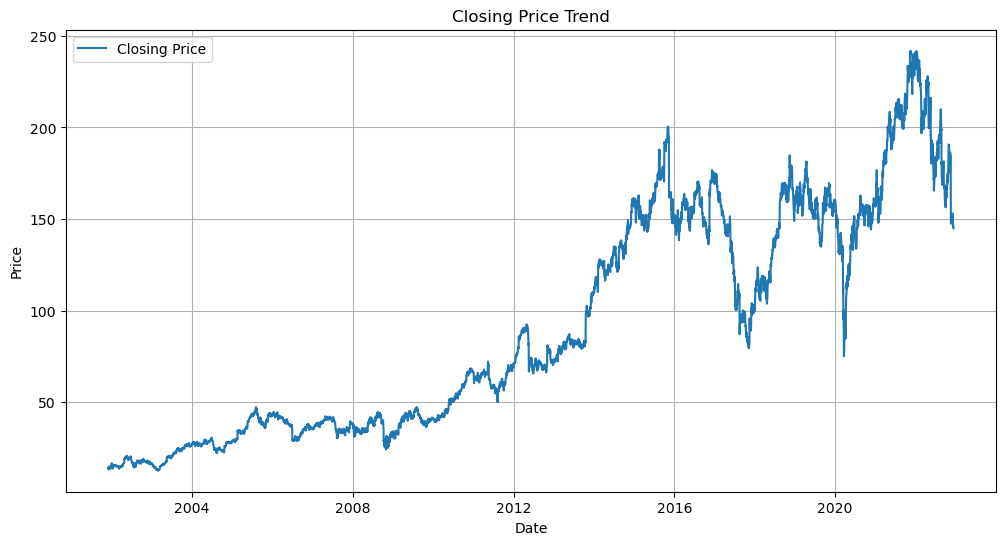

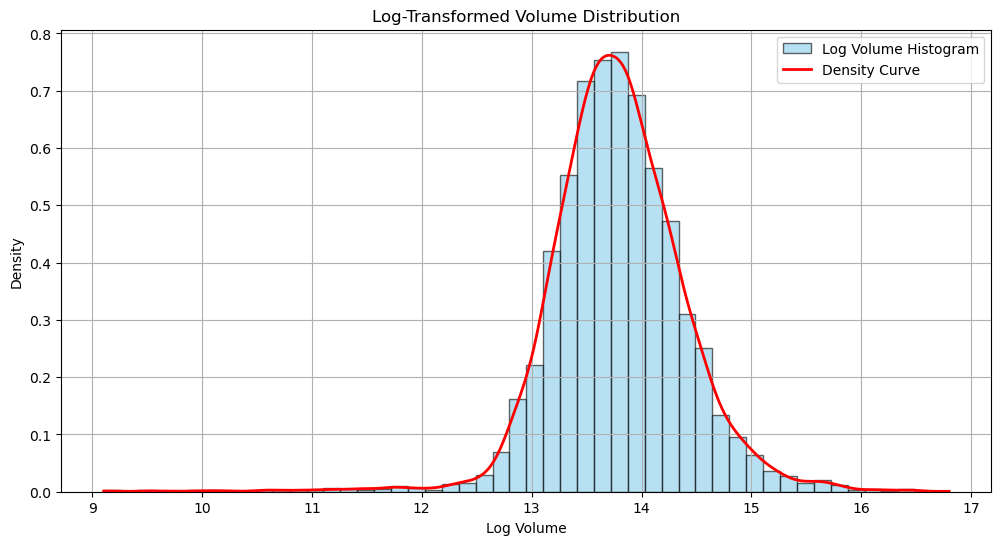

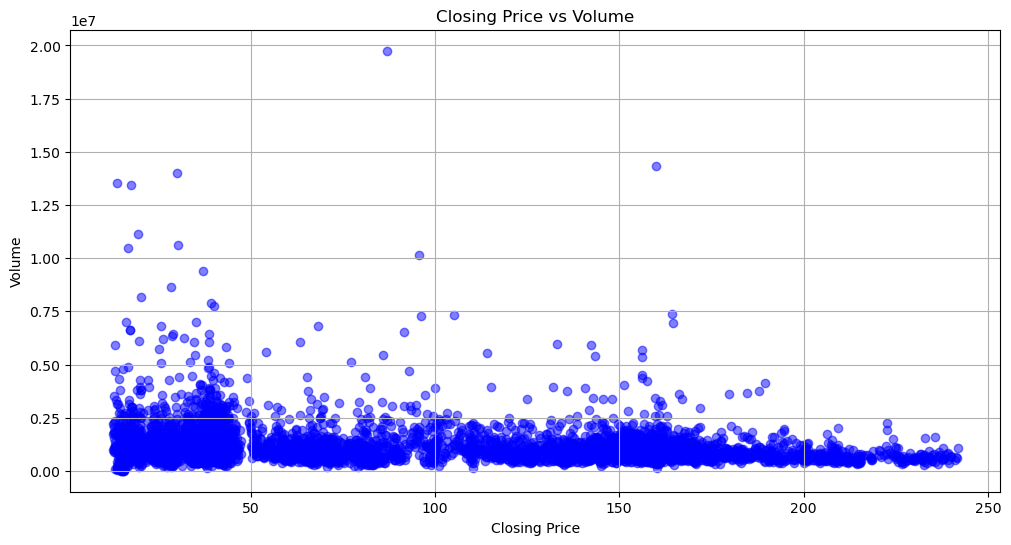

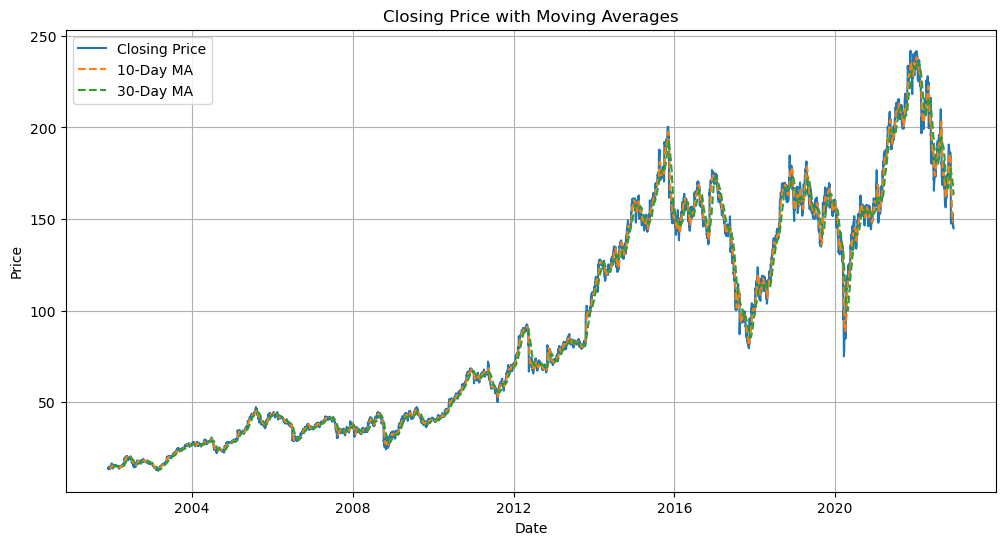

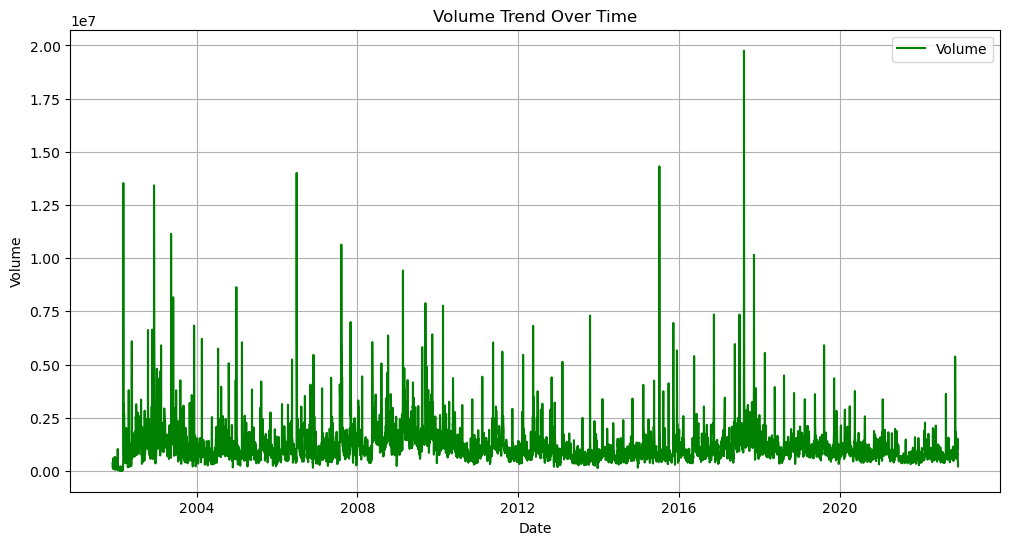

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# from scipy.stats import gaussian_kde
# import numpy as np

# # Ensure the 'Date' column is in datetime format
# cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

# # Plot Closing Price Trend
# # This section visualizes the closing price trend over time
# plt.figure(figsize=(12, 6))
# plt.plot(cleaned_data['Date'], cleaned_data['Close'], label='Closing Price')
# plt.title('Closing Price Trend')  
# plt.xlabel('Date')  
# plt.ylabel('Price')  
# plt.legend()  
# plt.grid(True)  
# plt.show()

# # # Plot Volume Distribution Histogram
# # # This section analyzes the distribution of trade volume using a histogram
# # plt.figure(figsize=(12, 6))
# # plt.hist(cleaned_data['Volume'], bins=50, color='skyblue', edgecolor='black')
# # plt.title('Volume Distribution')  # Title of the histogram
# # plt.xlabel('Volume')  # Label for the X-axis
# # plt.ylabel('Frequency')  # Label for the Y-axis
# # plt.grid(True)  
# # plt.show()


# # Plot Volume Distribution Histogram with Density Curve and Log Transformation
# # Analyze the distribution of trade volume using a histogram and overlay a density curve with log-transformed data
# plt.figure(figsize=(12, 6))

# # Apply log transformation to Volume to reduce skewness
# log_volume = np.log(cleaned_data['Volume'])

# # Plot the normalized histogram of log-transformed trade volumes
# plt.hist(log_volume, bins=50, color='skyblue', edgecolor='black', density=True, alpha=0.6, label='Log Volume Histogram')

# # Calculate the kernel density estimate for log-transformed trade volumes
# density = gaussian_kde(log_volume)
# x_vals = np.linspace(log_volume.min(), log_volume.max(), 1000)

# # Plot the density curve on top of the histogram
# plt.plot(x_vals, density(x_vals), color='red', linewidth=2, label='Density Curve')
# plt.title('Log-Transformed Volume Distribution')
# plt.xlabel('Log Volume')
# plt.ylabel('Density')
# plt.legend()
# plt.grid(True)
# plt.show()


# # Scatter Plot of Closing Price vs Volume
# # This section investigates the relationship between closing price and volume
# plt.figure(figsize=(12, 6))
# plt.scatter(cleaned_data['Close'], cleaned_data['Volume'], alpha=0.5, c='blue')
# plt.title('Closing Price vs Volume')  # Title of the scatter plot
# plt.xlabel('Closing Price')  # Label for the X-axis
# plt.ylabel('Volume')  # Label for the Y-axis
# plt.grid(True)  # Add a grid for better readability
# plt.show()

# # Calculate Moving Averages
# # This section calculates moving averages to smooth out price data
# cleaned_data['MA_10'] = cleaned_data['Close'].rolling(window=10).mean()  # 10-day moving average
# cleaned_data['MA_30'] = cleaned_data['Close'].rolling(window=30).mean()  # 30-day moving average

# # Plotting Closing Price with Moving Averages
# # This section visualizes the closing price along with its moving averages
# plt.figure(figsize=(12, 6))
# plt.plot(cleaned_data['Date'], cleaned_data['Close'], label='Closing Price')
# plt.plot(cleaned_data['Date'], cleaned_data['MA_10'], label='10-Day MA', linestyle='--')  # 10-day MA
# plt.plot(cleaned_data['Date'], cleaned_data['MA_30'], label='30-Day MA', linestyle='--')  # 30-day MA
# plt.title('Closing Price with Moving Averages')  # Title of the chart
# plt.xlabel('Date')  # Label for the X-axis
# plt.ylabel('Price')  # Label for the Y-axis
# plt.legend()  # Add a legend to distinguish the lines
# plt.grid(True)  # Add a grid for better readability
# plt.show()

# # Plot Volume Time Series
# # This section visualizes the volume trend over time
# plt.figure(figsize=(12, 6))
# plt.plot(cleaned_data['Date'], cleaned_data['Volume'], label='Volume', color='green')
# plt.title('Volume Trend Over Time')  # Title of the chart
# plt.xlabel('Date')  # Label for the X-axis
# plt.ylabel('Volume')  # Label for the Y-axis
# plt.legend()  # Add a legend to identify the line
# plt.grid(True)  # Add a grid for clarity
# plt.show()



Dataset (First 10 rows):


,Date,Low,Open,Volume,High,Close,Adjusted Close
0,29-11-2001,13.360000,13.386667,371100,14.466667,13.880000,12.583543
1,30-11-2001,13.880000,13.880000,165300,14.266667,14.266667,12.934094
2,03-12-2001,13.783333,14.233333,127500,14.233333,13.783333,12.495903
3,04-12-2001,13.233333,13.783333,95400,13.783333,13.233333,11.997280
4,05-12-2001,13.433333,13.433333,598200,14.783333,14.666667,13.296731
5,06-12-2001,14.570000,14.733333,157200,14.733333,14.573333,13.212116
6,07-12-2001,14.466667,14.583333,215100,14.666667,14.666667,13.296731
7,10-12-2001,14.586667,14.633333,119100,14.640000,14.616667,13.251404
8,11-12-2001,14.586667,14.600000,378600,14.710000,14.586667,13.224202
9,12-12-2001,14.036667,14.583333,114600,14.583333,14.100000,12.782995


Missing values in Data:
Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

Data Types:
Date               object
Low               float64
Open              float64
Volume              int64
High              float64
Close             float64
Adjusted Close    float64
dtype: object

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5296 entries, 0 to 5295
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5296 non-null   object 
 1   Low             5296 non-null   float64
 2   Open            5296 non-null   float64
 3   Volume          5296 non-null   int64  
 4   High            5296 non-null   float64
 5   Close           5296 non-null   float64
 6   Adjusted Close  5296 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 289.8+ KB
None
High-Low Relationship 

C:\Users\lusus\AppData\Local\Temp\ipykernel_18396\1442574967.py:80: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])


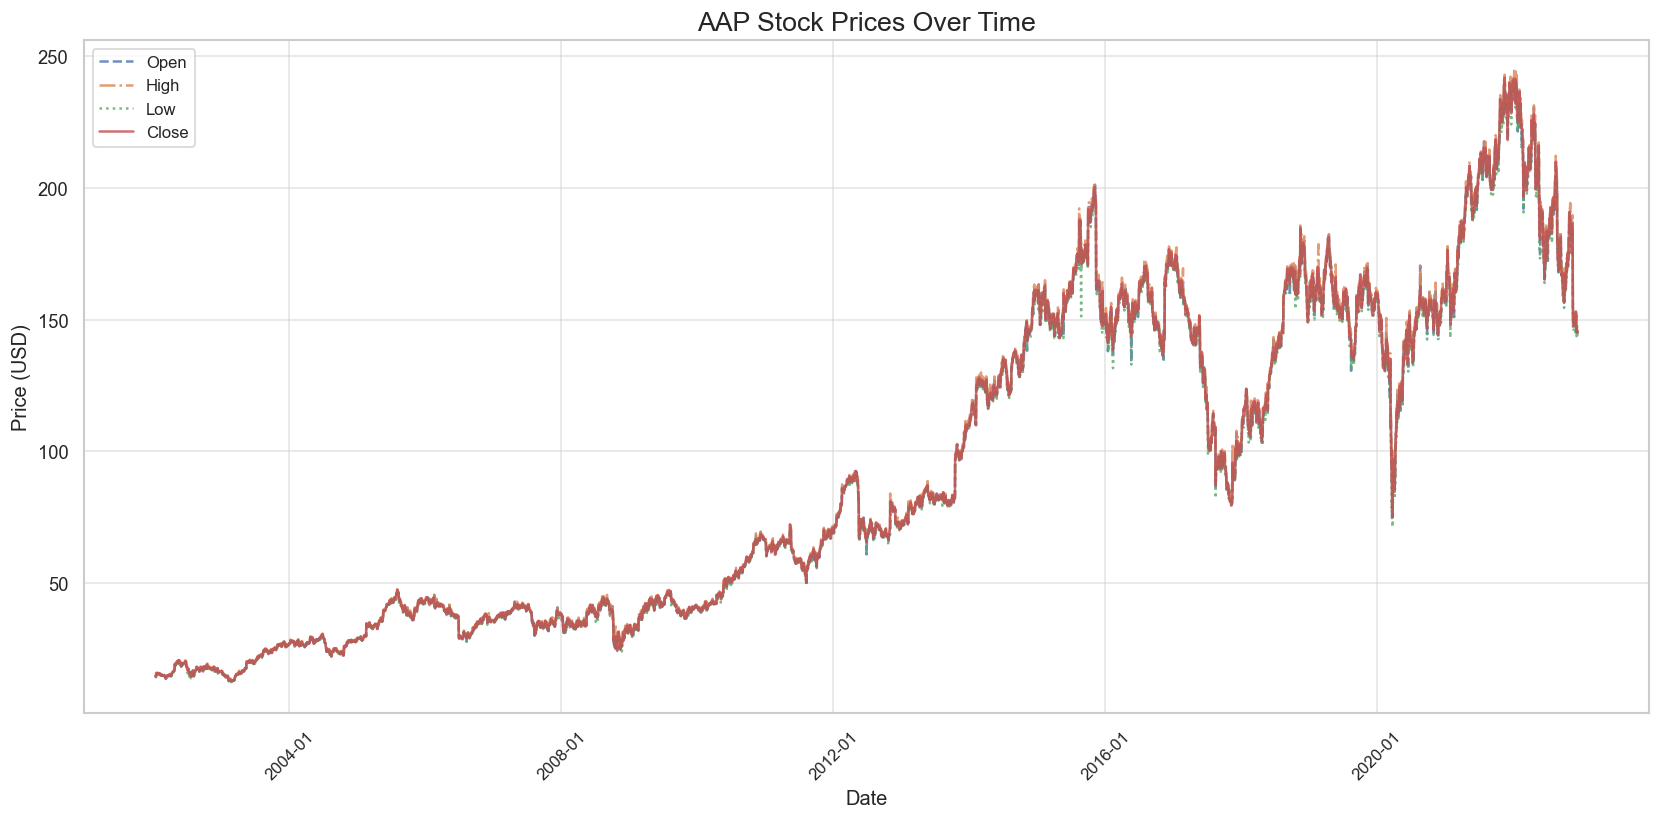

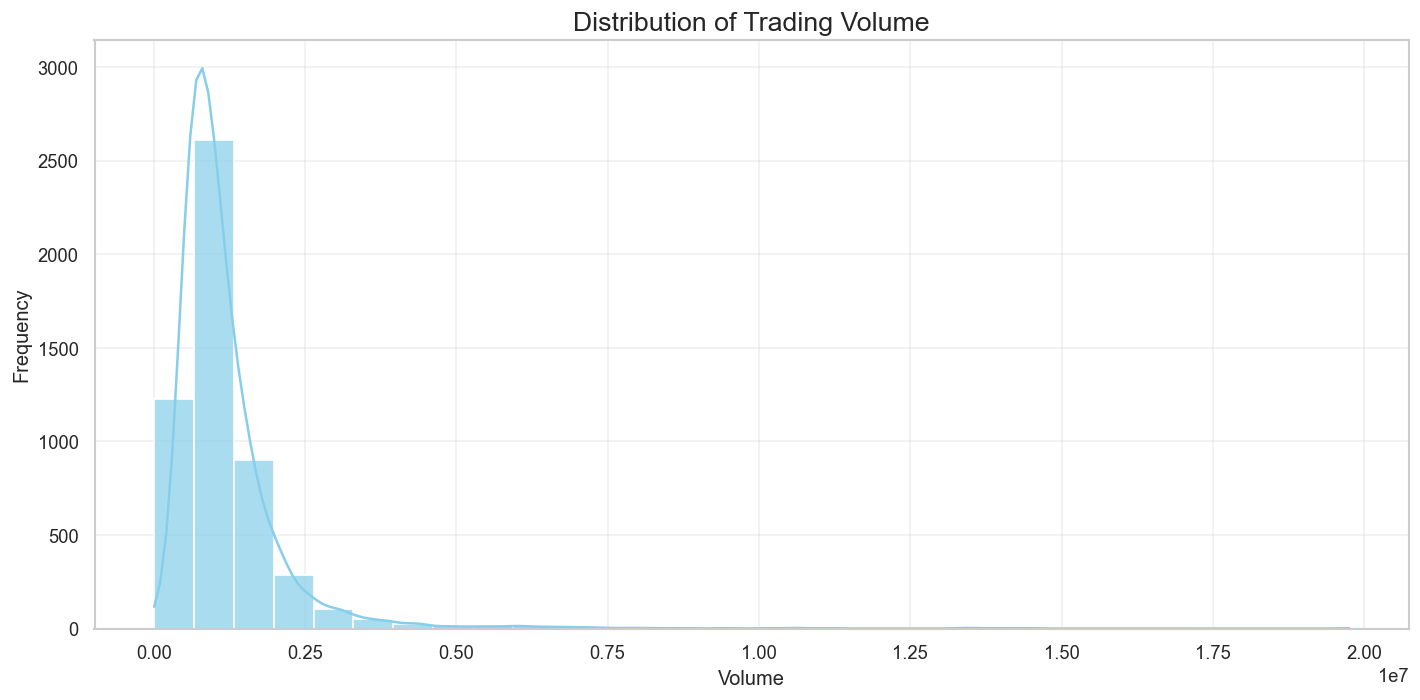

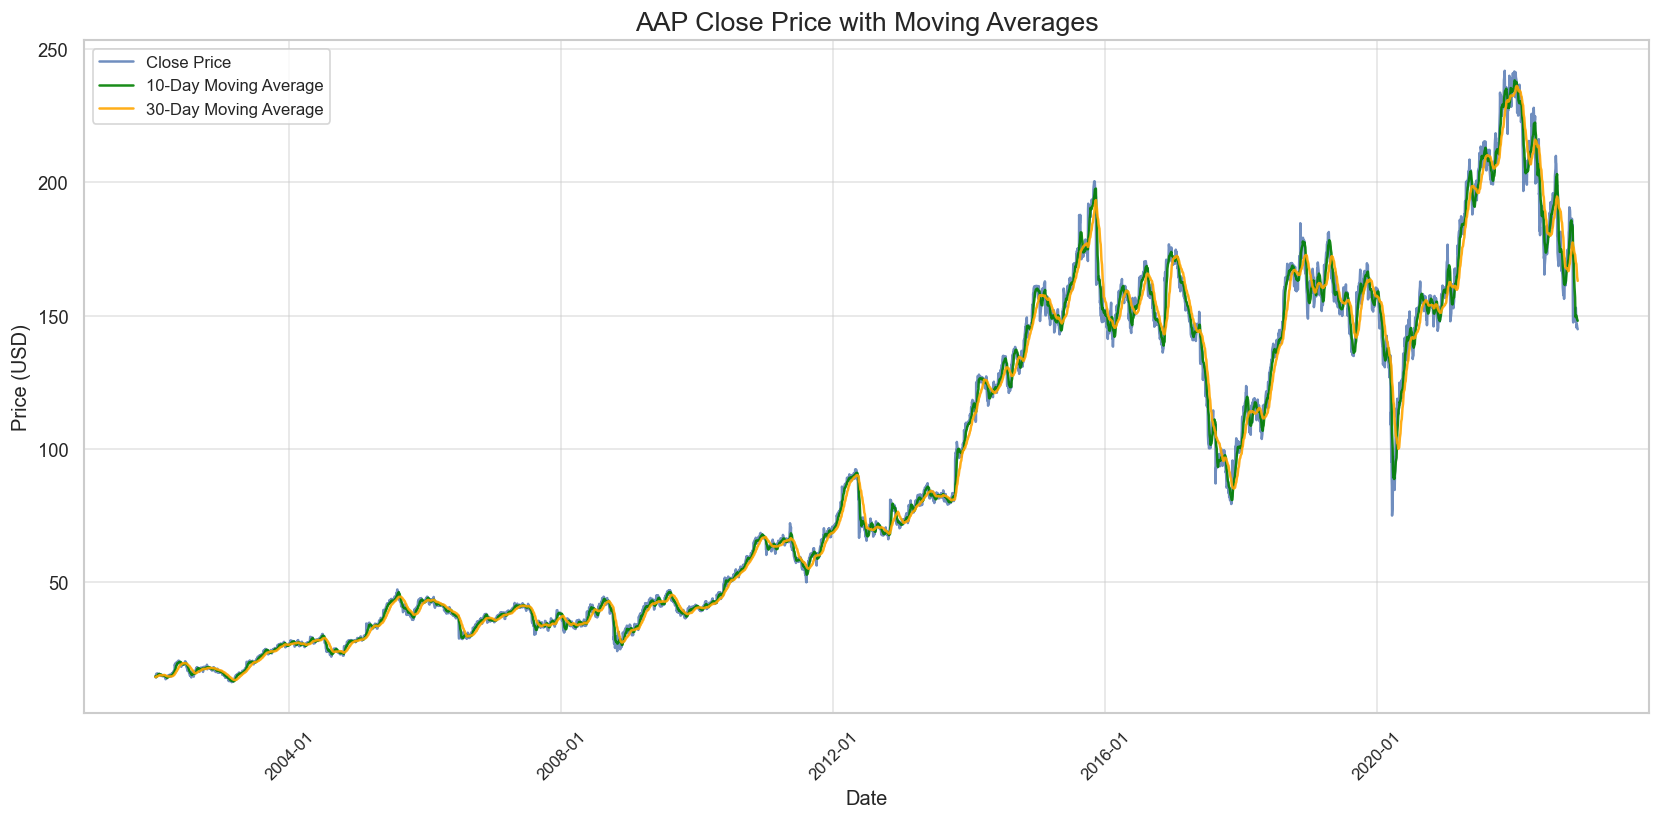

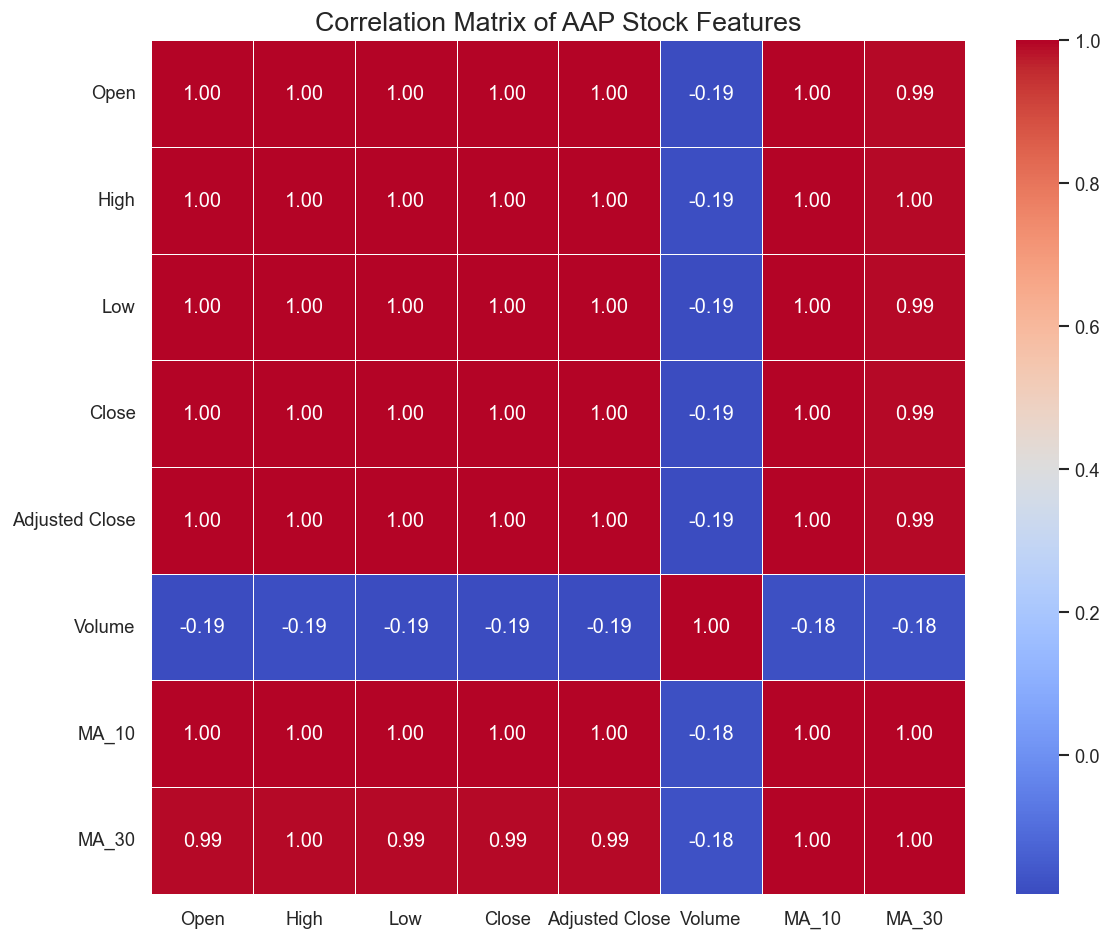

Train set: X=(3665, 30, 9), y=(3665, 1)
Validation set: X=(786, 30, 9), y=(786, 1)
Test set: X=(786, 30, 9), y=(786, 1)
Data splits saved in directory: data_splits


In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from IPython.display import display

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Set plot aesthetics
sns.set(style="whitegrid")

# Set the file path
data_file_path = './data/stock_market_data/nyse/csv/AAP.csv'  

def load_and_inspect_data(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)
    
    print("\nDataset (First 10 rows):")
    display(data.head(10))
    
    # Check for missing values
    print("Missing values in Data:")
    print(data.isnull().sum())
    
    # Display data types and information
    print("\nData Types:")
    print(data.dtypes)
    print("\nData Info:")
    print(data.info())
    
    return data

def remove_outliers_in_adjusted_close(data, threshold=3):
    # Calculate the adjustment factor between "Close" and "Adjusted Close"
    data['Adjustment Factor'] = data['Adjusted Close'] / data['Close']
    
    # Calculate the mean and standard deviation of the adjustment factor
    mean_factor = data['Adjustment Factor'].mean()
    std_factor = data['Adjustment Factor'].std()
    
    # Compute the z-score
    data['z_score'] = (data['Adjustment Factor'] - mean_factor) / std_factor
    
    # Retain data within the z-score threshold
    cleaned_data = data[abs(data['z_score']) <= threshold].copy()
    
    # Drop auxiliary columns
    cleaned_data.drop(columns=['Adjustment Factor', 'z_score'], inplace=True)
    
    return cleaned_data

def detect_errors(cleaned_data):
    # Detect logical errors between High and Low
    high_low_errors = cleaned_data[cleaned_data['High'] < cleaned_data['Low']]
    
    # Detect if Open and Close are outside the High and Low range
    open_close_errors = cleaned_data[
        (cleaned_data['Open'] > cleaned_data['High']) | 
        (cleaned_data['Open'] < cleaned_data['Low']) |
        (cleaned_data['Close'] > cleaned_data['High']) | 
        (cleaned_data['Close'] < cleaned_data['Low'])
    ]
    
    # Detect anomalies in Volume
    mean_vol = cleaned_data['Volume'].mean()
    std_vol = cleaned_data['Volume'].std()
    volume_errors = cleaned_data[
        (cleaned_data['Volume'] < 0) | 
        (cleaned_data['Volume'] > mean_vol + 3 * std_vol)
    ]
    
    return high_low_errors, open_close_errors, volume_errors

def visualize_data(cleaned_data):
    # Ensure the 'Date' column is in datetime format and sort the data
    cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])
    cleaned_data.sort_values('Date', inplace=True)
    
    # Forward fill missing values
    cleaned_data.fillna(method='ffill', inplace=True)
    
    # Calculate moving averages
    cleaned_data['MA_10'] = cleaned_data['Close'].rolling(window=10).mean()
    cleaned_data['MA_30'] = cleaned_data['Close'].rolling(window=30).mean()
    
    # Drop rows with NA values in moving averages
    cleaned_data.dropna(subset=['MA_10', 'MA_30'], inplace=True)
    cleaned_data.reset_index(drop=True, inplace=True)
    
    # Visualize stock price trends
    plt.figure(figsize=(14, 7), dpi=120)
    plt.plot(cleaned_data['Date'], cleaned_data['Open'], label='Open', alpha=0.8, linestyle='--')
    plt.plot(cleaned_data['Date'], cleaned_data['High'], label='High', alpha=0.8, linestyle='-.')
    plt.plot(cleaned_data['Date'], cleaned_data['Low'], label='Low', alpha=0.8, linestyle=':')
    plt.plot(cleaned_data['Date'], cleaned_data['Close'], label='Close', alpha=0.8, linestyle='-')
    plt.title('AAP Stock Prices Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.5)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()
    
    # Visualize volume distribution
    plt.figure(figsize=(12, 6), dpi=120)
    sns.histplot(cleaned_data['Volume'], bins=30, kde=True, color='skyblue', alpha=0.7)
    plt.title('Distribution of Trading Volume', fontsize=16)
    plt.xlabel('Volume', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Visualize close price with moving averages
    plt.figure(figsize=(14, 7), dpi=120)
    plt.plot(cleaned_data['Date'], cleaned_data['Close'], label='Close Price', alpha=0.8, linestyle='-')
    plt.plot(cleaned_data['Date'], cleaned_data['MA_10'], label='10-Day Moving Average', color='green', alpha=0.9)
    plt.plot(cleaned_data['Date'], cleaned_data['MA_30'], label='30-Day Moving Average', color='orange', alpha=0.9)
    plt.title('AAP Close Price with Moving Averages', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.5)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()
    
    # Visualize correlation matrix
    plt.figure(figsize=(10, 8), dpi=120)
    corr_matrix = cleaned_data[['Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume', 'MA_10', 'MA_30']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix of AAP Stock Features', fontsize=16)
    plt.tight_layout()
    plt.show()

def feature_engineering(data):
    # Calculate moving averages
    data['MA_10'] = data['Close'].rolling(window=10).mean()
    data['MA_30'] = data['Close'].rolling(window=30).mean()
    data['Volatility_10'] = data['Close'].rolling(window=10).std()
    data['Volume_Change_Rate'] = data['Volume'].pct_change()
    
    # Handle missing values
    data.fillna(method='bfill', inplace=True)
    data.fillna(method='ffill', inplace=True)
    
    return data

def normalize_data(data, features_to_normalize):
    # Initialize the scaler
    scaler = MinMaxScaler()
    # Normalize the specified features
    data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])
    return data, scaler

def create_sliding_window(data, feature_columns, target_column, N, M):
    # Initialize lists to hold the sliding windows
    X, y = [], []
    feature_data = data[feature_columns].values
    target_data = data[target_column].values
    for i in range(len(data) - N - M + 1):
        X.append(feature_data[i:i+N])
        y.append(target_data[i+N:i+N+M])
    return np.array(X), np.array(y)

def split_data(X, y, train_ratio=0.7, val_ratio=0.15):
    # Calculate the number of samples
    total_samples = len(X)
    train_end = int(total_samples * train_ratio)
    val_end = int(total_samples * (train_ratio + val_ratio))
    
    # Split the data into training, validation, and testing sets
    X_train = X[:train_end]
    y_train = y[:train_end]
    X_val = X[train_end:val_end]
    y_val = y[train_end:val_end]
    X_test = X[val_end:]
    y_test = y[val_end:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

def save_data_splits(X_train, y_train, X_val, y_val, X_test, y_test, output_dir="data_splits"):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    # Save the datasets as compressed .npz files
    np.savez_compressed(os.path.join(output_dir, "train_data.npz"), X=X_train, y=y_train)
    np.savez_compressed(os.path.join(output_dir, "val_data.npz"), X=X_val, y=y_val)
    np.savez_compressed(os.path.join(output_dir, "test_data.npz"), X=X_test, y=y_test)
    print(f"Data splits saved in directory: {output_dir}")

if __name__ == "__main__":
    # Load and inspect the data
    data = load_and_inspect_data(data_file_path)
    
    # Remove outliers
    cleaned_data = remove_outliers_in_adjusted_close(data)
    
    # Detect errors in the data
    high_low_errors, open_close_errors, volume_errors = detect_errors(cleaned_data)
    
    # Output the error detection results
    print("High-Low Relationship Errors:")
    print(high_low_errors)
    
    print("\nOpen-Close Range Errors:")
    print(open_close_errors)
    
    print("\nVolume Errors:")
    print(volume_errors)
    
    # Visualize the data
    visualize_data(cleaned_data)
    
    # Perform feature engineering
    engineered_data = feature_engineering(cleaned_data)
    
    # Select features to normalize
    features_to_normalize = ['Open', 'High', 'Low', 'Close', 'Volume', 
                             'MA_10', 'MA_30', 'Volatility_10', 'Volume_Change_Rate']
    
    # Normalize the data
    normalized_data, scaler = normalize_data(engineered_data, features_to_normalize)
    
    # Create sliding windows
    N = 30  # Time steps
    M = 1   # Prediction steps
    feature_columns = features_to_normalize
    target_column = 'Close'
    X, y = create_sliding_window(normalized_data, feature_columns, target_column, N, M)
    
    # Split the data into training, validation, and testing sets
    X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)
    
    # Output the shapes of the datasets
    print(f"Train set: X={X_train.shape}, y={y_train.shape}")
    print(f"Validation set: X={X_val.shape}, y={y_val.shape}")
    print(f"Test set: X={X_test.shape}, y={y_test.shape}")
    
    # Save the data splits
    save_data_splits(X_train, y_train, X_val, y_val, X_test, y_test)


In [ ]:
# Prepare data for RNN
def prepare_sequences(data, target_column, sequence_length=30):
    
    features = data.drop(columns=[target_column, 'Date']).values
    target = data[target_column].values
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(features[i:i + sequence_length])
        y.append(target[i + sequence_length])
    return np.array(X), np.array(y)

# Prepare sequences
X, y = prepare_sequences(cleaned_data, target_column='Close', sequence_length=30)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Add dimension for compatibility

# Split into training and validation sets
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

## Vanilla RNN

Epoch 1/20, Train Loss: 0.004965, Validation Loss: 0.005563
Epoch 2/20, Train Loss: 0.000125, Validation Loss: 0.003070
Epoch 3/20, Train Loss: 0.000088, Validation Loss: 0.001885
Epoch 4/20, Train Loss: 0.000077, Validation Loss: 0.001454
Epoch 5/20, Train Loss: 0.000081, Validation Loss: 0.001272
Epoch 6/20, Train Loss: 0.000086, Validation Loss: 0.001120
Epoch 7/20, Train Loss: 0.000096, Validation Loss: 0.001103
Epoch 8/20, Train Loss: 0.000078, Validation Loss: 0.000990
Epoch 9/20, Train Loss: 0.000092, Validation Loss: 0.001081
Epoch 10/20, Train Loss: 0.000070, Validation Loss: 0.000891
Epoch 11/20, Train Loss: 0.000101, Validation Loss: 0.000876
Epoch 12/20, Train Loss: 0.000076, Validation Loss: 0.000865
Epoch 13/20, Train Loss: 0.000076, Validation Loss: 0.000820
Epoch 14/20, Train Loss: 0.000130, Validation Loss: 0.000877
Epoch 15/20, Train Loss: 0.000092, Validation Loss: 0.000843
Epoch 16/20, Train Loss: 0.000079, Validation Loss: 0.000883
Epoch 17/20, Train Loss: 0.000083

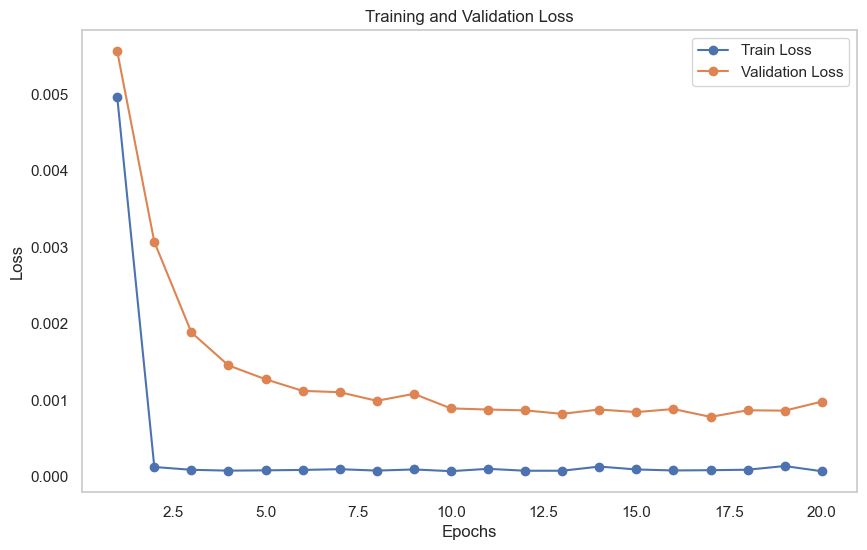

In [71]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt


# Create DataLoaders
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)

# Define the RNN model
class StockPredictorRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(StockPredictorRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])  # Take the output of the last time step

# Set model parameters
input_size = X_train.shape[2]  # Number of features
hidden_size = 64               # Number of hidden units
output_size = 1                # Predict one value
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model, loss function, and optimizer
model = StockPredictorRNN(input_size, hidden_size, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training and validation functions
def train_model(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def validate_model(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()
    return total_loss / len(dataloader)

# Train the model
epochs = 20
train_losses, val_losses = [], []

for epoch in range(epochs):
    train_loss = train_model(model, train_loader, criterion, optimizer, device)
    val_loss = validate_model(model, val_loader, criterion, device)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}")

# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()



Testing combination: lr=0.01, hidden_size=32, batch_size=16
Epoch 1/40: Train Loss = 0.003706, Validation Loss = 0.003292
Epoch 2/40: Train Loss = 0.000290, Validation Loss = 0.003127
Epoch 3/40: Train Loss = 0.000308, Validation Loss = 0.002814
Epoch 4/40: Train Loss = 0.000328, Validation Loss = 0.004917
Epoch 5/40: Train Loss = 0.000360, Validation Loss = 0.003410
Epoch 6/40: Train Loss = 0.000363, Validation Loss = 0.002752
Epoch 7/40: Train Loss = 0.000381, Validation Loss = 0.007201
Epoch 8/40: Train Loss = 0.000425, Validation Loss = 0.003100
Epoch 9/40: Train Loss = 0.000328, Validation Loss = 0.003023
Epoch 10/40: Train Loss = 0.000534, Validation Loss = 0.003528
Epoch 11/40: Train Loss = 0.000495, Validation Loss = 0.005109
Epoch 12/40: Train Loss = 0.000578, Validation Loss = 0.006270
Epoch 13/40: Train Loss = 0.000330, Validation Loss = 0.004587
Epoch 14/40: Train Loss = 0.000389, Validation Loss = 0.004367
Epoch 15/40: Train Loss = 0.000537, Validation Loss = 0.006096
Epo

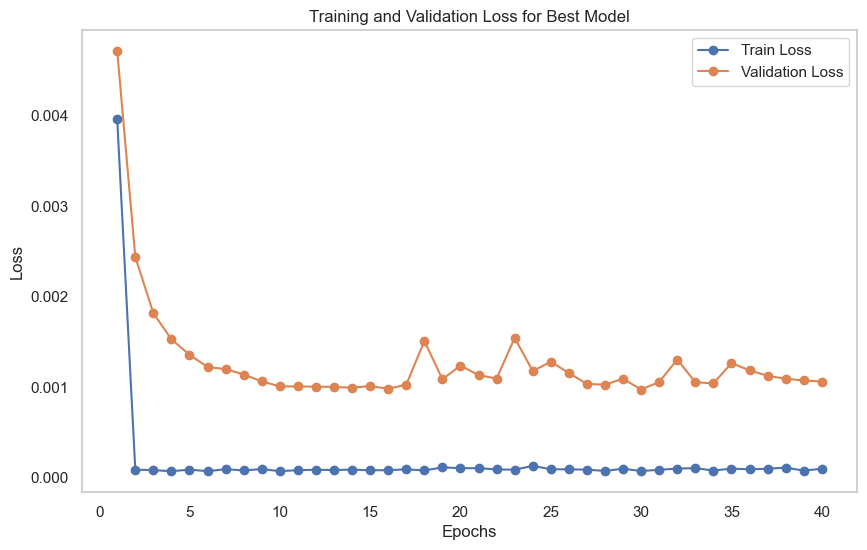

Best model saved to best_stock_predictor_rnn.pth


In [80]:
# Tuning the Hyperparameters
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from itertools import product
import pickle

# Hyperparameter grid
learning_rates = [0.01, 0.05, 0.001]
hidden_sizes = [32, 64, 128]
batch_sizes = [16, 32]

# Prepare sequences
def prepare_sequences(data, target_column, sequence_length=30):
    features = data.drop(columns=[target_column, 'Date']).values
    target = data[target_column].values
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(features[i:i + sequence_length])
        y.append(target[i + sequence_length])
    return np.array(X), np.array(y)

# Prepare data
X, y = prepare_sequences(cleaned_data, target_column='Close', sequence_length=30)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Split into training and validation sets
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Define RNN model
class StockPredictorRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(StockPredictorRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])  # Take the output of the last time step

# Training and validation functions
def train_model(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def validate_model(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()
    return total_loss / len(dataloader)

# Hyperparameter tuning
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = X_train.shape[2]
output_size = 1
epochs = 40
best_params = None
best_val_loss = float('inf')
best_model = None

results = []

for lr, hidden_size, batch_size in product(learning_rates, hidden_sizes, batch_sizes):
    print(f"\nTesting combination: lr={lr}, hidden_size={hidden_size}, batch_size={batch_size}")
    
    # Prepare DataLoaders
    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)
    
    # Initialize model, criterion, and optimizer
    model = StockPredictorRNN(input_size, hidden_size, output_size).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    # Train the model
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        train_loss = train_model(model, train_loader, criterion, optimizer, device)
        val_loss = validate_model(model, val_loader, criterion, device)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{epochs}: Train Loss = {train_loss:.6f}, Validation Loss = {val_loss:.6f}")
    
    # Save results
    avg_val_loss = np.mean(val_losses[-5:])  # Average validation loss of the last 5 epochs
    results.append((lr, hidden_size, batch_size, train_losses, val_losses, avg_val_loss))
    
    # Check for the best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_params = (lr, hidden_size, batch_size)
        best_model = model
        best_train_losses = train_losses
        best_val_losses = val_losses

    print(f"Validation Loss for combination lr={lr}, hidden_size={hidden_size}, batch_size={batch_size}: {avg_val_loss:.6f}")

# Print best parameters
print(f"\nBest Parameters: lr={best_params[0]}, hidden_size={best_params[1]}, batch_size={best_params[2]}")
print(f"Best Validation Loss: {best_val_loss:.6f}")

# Plot the training and validation loss of the best model
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), best_train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), best_val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Best Model')
plt.legend()
plt.grid()
plt.show()

# Save the best model
model_save_path = "best_stock_predictor_rnn.pth"
torch.save(best_model.state_dict(), model_save_path)
print(f"Best model saved to {model_save_path}")



Training with Learning Rate=0.01, Hidden Size=32, Batch Size=16
Epoch 1/50, Train Loss: 6574.289706, Validation Loss: 4147.454834
Epoch 2/50, Train Loss: 3813.669274, Validation Loss: 6455.641195
Epoch 3/50, Train Loss: 3744.441550, Validation Loss: 6821.998454
Epoch 4/50, Train Loss: 3737.695352, Validation Loss: 6658.212321
Epoch 5/50, Train Loss: 3756.539718, Validation Loss: 6845.751302
Epoch 6/50, Train Loss: 3740.261363, Validation Loss: 7073.872233
Epoch 7/50, Train Loss: 3741.994159, Validation Loss: 6781.112467
Epoch 8/50, Train Loss: 3759.794124, Validation Loss: 6696.685872
Epoch 9/50, Train Loss: 3744.918150, Validation Loss: 6856.344645
Epoch 10/50, Train Loss: 3737.143655, Validation Loss: 6728.804118
Epoch 11/50, Train Loss: 3742.602630, Validation Loss: 6712.586019
Epoch 12/50, Train Loss: 3745.957462, Validation Loss: 7003.251383
Epoch 13/50, Train Loss: 3736.986881, Validation Loss: 6442.395182
Epoch 14/50, Train Loss: 3740.697673, Validation Loss: 6486.318441
Epoch 

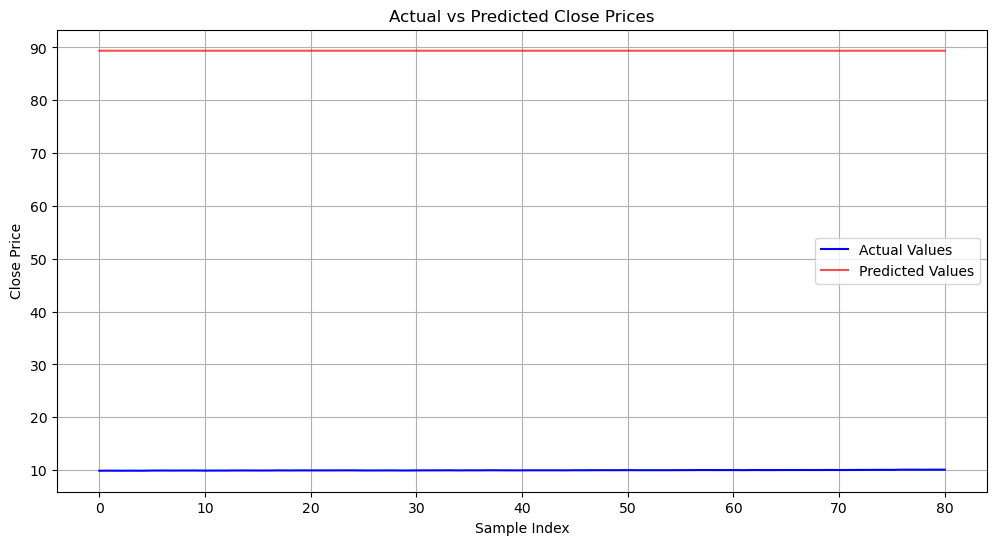

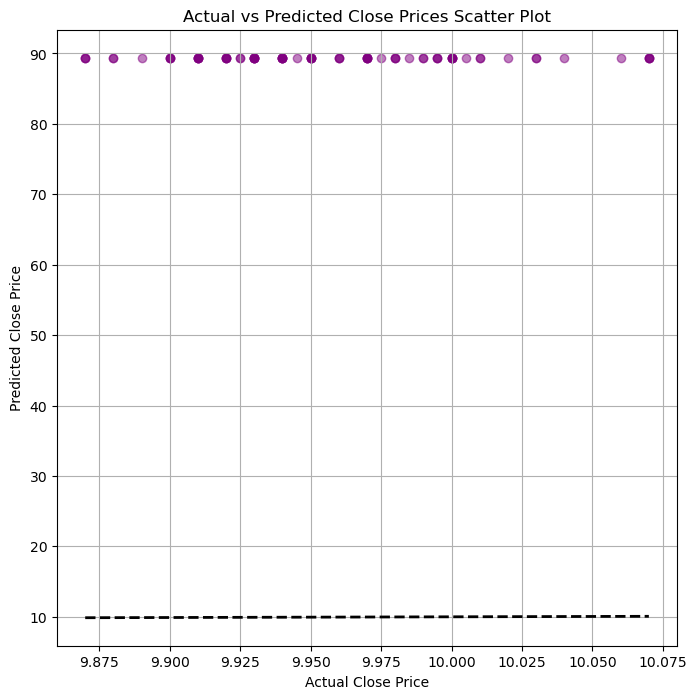


All Hyperparameter Combinations and their Validation Losses:
LR: 0.01, Hidden Size: 32, Batch Size: 16, Train Loss: 3746.708402, Val Loss: 6514.158122
LR: 0.01, Hidden Size: 32, Batch Size: 32, Train Loss: 3744.664563, Val Loss: 6531.208333
LR: 0.01, Hidden Size: 64, Batch Size: 16, Train Loss: 3741.299574, Val Loss: 6651.071208
LR: 0.01, Hidden Size: 64, Batch Size: 32, Train Loss: 3744.252048, Val Loss: 6605.474772
LR: 0.01, Hidden Size: 128, Batch Size: 16, Train Loss: 3752.686810, Val Loss: 6480.909017
LR: 0.01, Hidden Size: 128, Batch Size: 32, Train Loss: 3751.935865, Val Loss: 6390.017090
LR: 0.05, Hidden Size: 32, Batch Size: 16, Train Loss: 3746.949999, Val Loss: 6480.011637
LR: 0.05, Hidden Size: 32, Batch Size: 32, Train Loss: 3755.544589, Val Loss: 6574.744629
LR: 0.05, Hidden Size: 64, Batch Size: 16, Train Loss: 3756.463044, Val Loss: 7013.865397
LR: 0.05, Hidden Size: 64, Batch Size: 32, Train Loss: 3759.986265, Val Loss: 6377.590983
LR: 0.05, Hidden Size: 128, Batch Si

In [ ]:
# import numpy as np
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset
# import matplotlib.pyplot as plt
# import itertools
# import os

# # Define the Vanilla RNN model
# class VanillaRNN(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(VanillaRNN, self).__init__()
#         self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         out, _ = self.rnn(x)
#         return self.fc(out[:, -1, :])  # Extract the output from the last time step

# # Define the training function
# def train_model(model, dataloader, criterion, optimizer, device):
#     model.train()
#     total_loss = 0
#     for X_batch, y_batch in dataloader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         optimizer.zero_grad()
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()
#     return total_loss / len(dataloader)

# # Define the validation function
# def validate_model(model, dataloader, criterion, device):
#     model.eval()
#     total_loss = 0
#     with torch.no_grad():
#         for X_batch, y_batch in dataloader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             outputs = model(X_batch)
#             loss = criterion(outputs, y_batch)
#             total_loss += loss.item()
#     return total_loss / len(dataloader)

# # Set the device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Define hyperparameter grids
# learning_rates = [0.01, 0.05, 0.001]
# hidden_sizes = [32, 64, 128]
# batch_sizes = [16, 32]

# # Create all possible hyperparameter combinations
# hyperparameter_combinations = list(itertools.product(learning_rates, hidden_sizes, batch_sizes))

# # Initialize a list to store the results
# results = []

# # Initialize variables to track the best model
# best_val_loss = float('inf')
# best_result = None
# best_model_state = None

# # Create a directory to save loss plots
# os.makedirs("loss_plots", exist_ok=True)

# # Iterate over each hyperparameter combination
# for lr, hidden_size, batch_size in hyperparameter_combinations:
#     print(f"\nTraining with Learning Rate={lr}, Hidden Size={hidden_size}, Batch Size={batch_size}")
    
#     # Load the training data
#     train_data = np.load("Train_Time_Series.npz")
#     X_train = torch.tensor(train_data['x_train'], dtype=torch.float32)
#     y_train = torch.tensor(train_data['y_train'], dtype=torch.float32).unsqueeze(1)
    
#     # Load the validation data
#     val_data = np.load("Validation_Time_Series.npz")
#     X_val = torch.tensor(val_data['x_val'], dtype=torch.float32)
#     y_val = torch.tensor(val_data['y_val'], dtype=torch.float32).unsqueeze(1)
    
#     # Create DataLoaders with the current batch size
#     train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
#     val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)
    
#     # Initialize the model with the current hidden size
#     input_size = X_train.shape[2]  # Number of input features
#     output_size = 1                # Output dimension
#     model = VanillaRNN(input_size, hidden_size, output_size).to(device)
    
#     # Define the loss function and optimizer with the current learning rate
#     criterion = nn.MSELoss()
#     optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
#     # Set the number of epochs
#     epochs = 50
#     train_losses, val_losses = [], []
    
#     # Train the model for the specified number of epochs
#     for epoch in range(epochs):
#         train_loss = train_model(model, train_loader, criterion, optimizer, device)
#         val_loss = validate_model(model, val_loader, criterion, device)
#         train_losses.append(train_loss)
#         val_losses.append(val_loss)
#         print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}")
    
#     # Record the final validation loss for this combination
#     final_val_loss = val_losses[-1]
#     results.append({
#         'learning_rate': lr,
#         'hidden_size': hidden_size,
#         'batch_size': batch_size,
#         'train_loss': train_losses[-1],
#         'val_loss': final_val_loss,
#         'train_losses': train_losses,
#         'val_losses': val_losses
#     })
    
#     # Check if this is the best model so far
#     if final_val_loss < best_val_loss:
#         best_val_loss = final_val_loss
#         best_result = {
#             'learning_rate': lr,
#             'hidden_size': hidden_size,
#             'batch_size': batch_size,
#             'train_loss': train_losses[-1],
#             'val_loss': final_val_loss,
#             'train_losses': train_losses,
#             'val_losses': val_losses
#         }
#         best_model_state = model.state_dict()
    
#     # Plot the training and validation loss curves
#     plt.figure(figsize=(10, 6))
#     plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o')
#     plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', marker='o')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.title(f'Train and Validation Loss\nLR={lr}, Hidden Size={hidden_size}, Batch Size={batch_size}')
#     plt.legend()
#     plt.grid()
#     plot_filename = f"loss_plots/loss_lr{lr}_hidden{hidden_size}_batch{batch_size}.png"
#     plt.savefig(plot_filename)
#     plt.close()
#     print(f"Saved loss plot to '{plot_filename}'")

# # Display the best hyperparameter combination
# print("\nBest Hyperparameter Combination:")
# print(f"Learning Rate: {best_result['learning_rate']}")
# print(f"Hidden Size: {best_result['hidden_size']}")
# print(f"Batch Size: {best_result['batch_size']}")
# print(f"Training Loss: {best_result['train_loss']:.6f}")
# print(f"Validation Loss: {best_result['val_loss']:.6f}")

# # Initialize the best model and load the best state
# best_model = VanillaRNN(input_size, best_result['hidden_size'], output_size).to(device)
# best_model.load_state_dict(best_model_state)
# best_model.eval()

# # Make predictions on the validation set
# with torch.no_grad():
#     predictions = best_model(X_val.to(device)).cpu().numpy()
#     actual = y_val.cpu().numpy()

# # Flatten the arrays for plotting
# predictions = predictions.flatten()
# actual = actual.flatten()

# # Plot the actual vs predicted values
# plt.figure(figsize=(12, 6))
# plt.plot(actual, label='Actual Values', color='blue')
# plt.plot(predictions, label='Predicted Values', color='red', alpha=0.7)
# plt.xlabel('Sample Index')
# plt.ylabel('Close Price')  # Assuming 'y_train' represents 'Close' price
# plt.title('Actual vs Predicted Close Prices')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Optionally, plot a scatter plot with a line y=x for reference
# plt.figure(figsize=(8, 8))
# plt.scatter(actual, predictions, alpha=0.5, color='purple')
# plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2)
# plt.xlabel('Actual Close Price')
# plt.ylabel('Predicted Close Price')
# plt.title('Actual vs Predicted Close Prices Scatter Plot')
# plt.grid(True)
# plt.show()

# # Display all hyperparameter combinations and their validation losses
# print("\nAll Hyperparameter Combinations and their Validation Losses:")
# for res in results:
#     print(f"LR: {res['learning_rate']}, Hidden Size: {res['hidden_size']}, Batch Size: {res['batch_size']}, Train Loss: {res['train_loss']:.6f}, Val Loss: {res['val_loss']:.6f}")


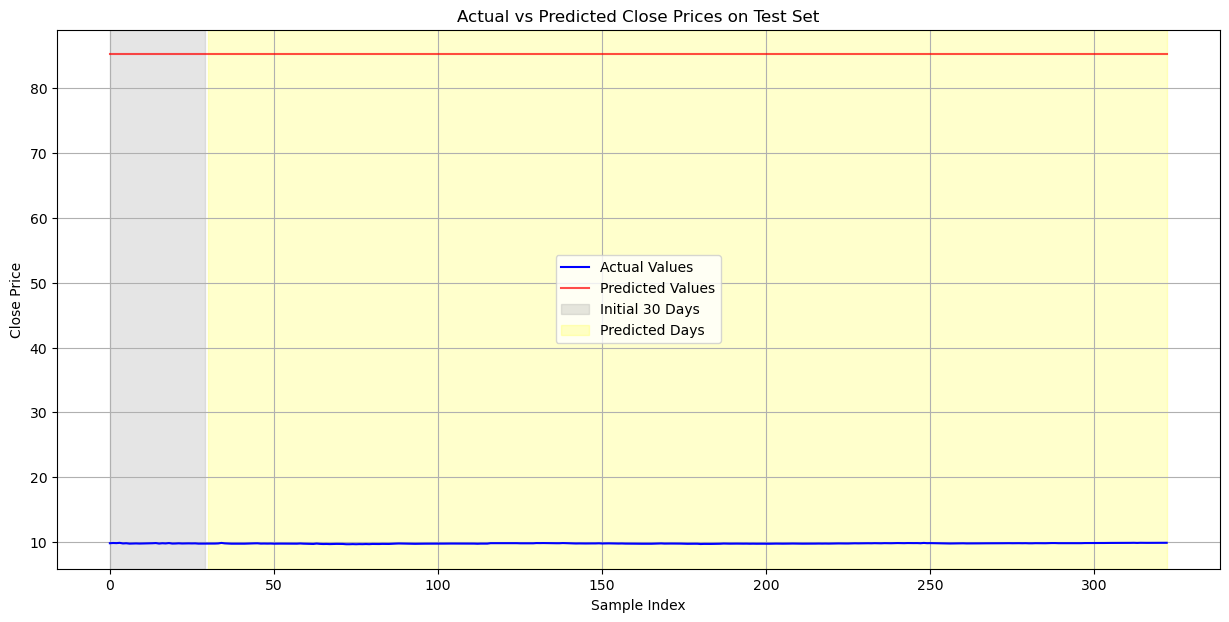

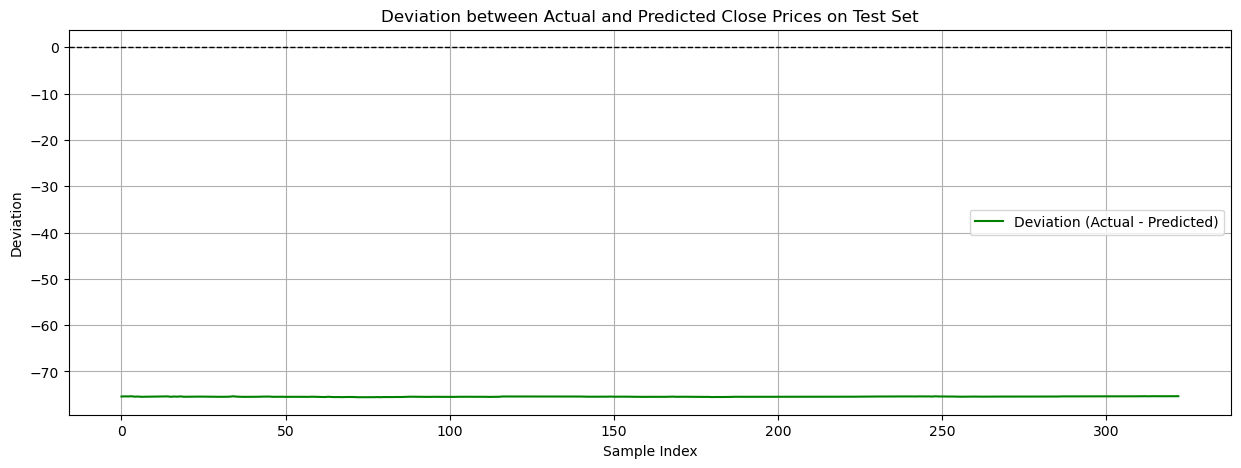

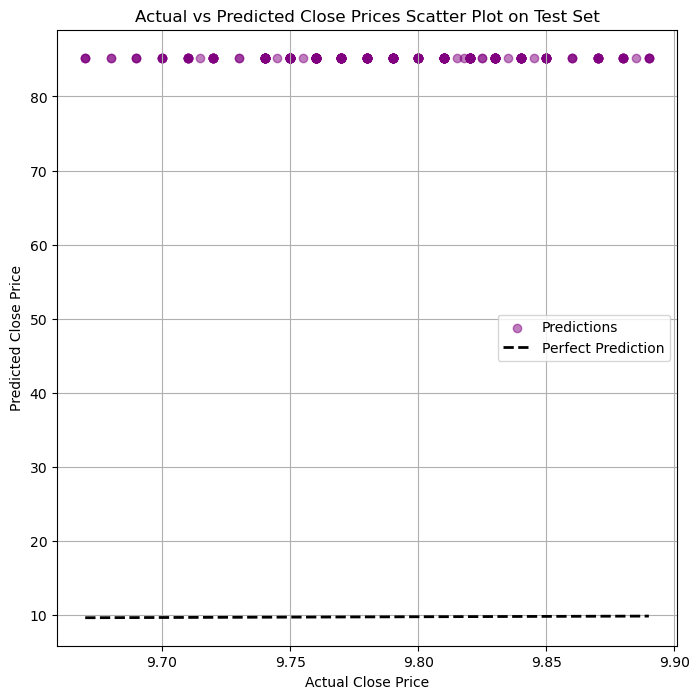


All Hyperparameter Combinations and their Validation Losses:
LR: 0.01, Hidden Size: 32, Batch Size: 16, Train Loss: 3742.366255, Val Loss: 6620.337321
LR: 0.01, Hidden Size: 32, Batch Size: 32, Train Loss: 3743.133453, Val Loss: 6858.312012
LR: 0.01, Hidden Size: 64, Batch Size: 16, Train Loss: 3746.730141, Val Loss: 7120.179118
LR: 0.01, Hidden Size: 64, Batch Size: 32, Train Loss: 3743.350956, Val Loss: 7048.564290
LR: 0.01, Hidden Size: 128, Batch Size: 16, Train Loss: 3749.435752, Val Loss: 6416.691406
LR: 0.01, Hidden Size: 128, Batch Size: 32, Train Loss: 3747.053936, Val Loss: 6408.732259
LR: 0.05, Hidden Size: 32, Batch Size: 16, Train Loss: 3743.518614, Val Loss: 6980.328206
LR: 0.05, Hidden Size: 32, Batch Size: 32, Train Loss: 3744.283967, Val Loss: 6744.120117
LR: 0.05, Hidden Size: 64, Batch Size: 16, Train Loss: 3752.994917, Val Loss: 6373.891276
LR: 0.05, Hidden Size: 64, Batch Size: 32, Train Loss: 3744.826752, Val Loss: 6343.609212
LR: 0.05, Hidden Size: 128, Batch Si

In [ ]:
# test_data = np.load("Test_Time_Series.npz")
# X_test = torch.tensor(test_data['x_test'], dtype=torch.float32)
# y_test = torch.tensor(test_data['y_test'], dtype=torch.float32).unsqueeze(1)

# # Create a DataLoader for the test set
# test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=1, shuffle=False)

# # Make predictions on the test set
# predictions = []
# actual = []

# with torch.no_grad():
#     for X_batch, y_batch in test_loader:
#         X_batch = X_batch.to(device)
#         output = best_model(X_batch)
#         predictions.append(output.cpu().numpy()[0][0])
#         actual.append(y_batch.numpy()[0][0])

# # Convert lists to NumPy arrays
# predictions = np.array(predictions)
# actual = np.array(actual)

# # Calculate deviations
# deviations = actual - predictions

# # Plot Actual vs Predicted Values
# plt.figure(figsize=(15, 7))
# plt.plot(actual, label='Actual Values', color='blue')

# # Overlay Predicted Values
# plt.plot(predictions, label='Predicted Values', color='red', alpha=0.7)

# # Highlight the first 30 days in a different color
# plt.axvspan(0, 29, color='gray', alpha=0.2, label='Initial 30 Days')

# # Highlight the predicted values (from day 31 onwards) with a different color
# plt.axvspan(30, len(actual)-1, color='yellow', alpha=0.2, label='Predicted Days')

# plt.xlabel('Sample Index')
# plt.ylabel('Close Price')  # Adjust this label based on your actual target variable
# plt.title('Actual vs Predicted Close Prices on Test Set')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot Deviation
# plt.figure(figsize=(15, 5))
# plt.plot(deviations, label='Deviation (Actual - Predicted)', color='green')
# plt.axhline(0, color='black', linewidth=1, linestyle='--')
# plt.xlabel('Sample Index')
# plt.ylabel('Deviation')
# plt.title('Deviation between Actual and Predicted Close Prices on Test Set')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Scatter Plot: Actual vs Predicted
# plt.figure(figsize=(8, 8))
# plt.scatter(actual, predictions, alpha=0.5, color='purple', label='Predictions')
# plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2, label='Perfect Prediction')
# plt.xlabel('Actual Close Price')
# plt.ylabel('Predicted Close Price')
# plt.title('Actual vs Predicted Close Prices Scatter Plot on Test Set')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Display all hyperparameter combinations and their validation losses
# print("\nAll Hyperparameter Combinations and their Validation Losses:")
# for res in results:
#     print(f"LR: {res['learning_rate']}, Hidden Size: {res['hidden_size']}, Batch Size: {res['batch_size']}, Train Loss: {res['train_loss']:.6f}, Val Loss: {res['val_loss']:.6f}")


Training with Learning Rate=0.01, Hidden Size=32, Batch Size=16
Epoch 1/50, Train Loss: 1827.531334, Validation Loss: 15040.756022
Epoch 2/50, Train Loss: 4182.442840, Validation Loss: 12715.070150
Epoch 3/50, Train Loss: 3949.268016, Validation Loss: 12181.243652
Epoch 4/50, Train Loss: 3901.561277, Validation Loss: 11989.151530
Epoch 5/50, Train Loss: 3887.309310, Validation Loss: 11898.544271
Epoch 6/50, Train Loss: 3881.658232, Validation Loss: 11848.079590
Epoch 7/50, Train Loss: 3878.888390, Validation Loss: 11817.192057
Epoch 8/50, Train Loss: 3877.328358, Validation Loss: 11797.239258
Epoch 9/50, Train Loss: 3876.377676, Validation Loss: 11783.910482
Epoch 10/50, Train Loss: 3875.769007, Validation Loss: 11774.797526
Epoch 11/50, Train Loss: 3875.361005, Validation Loss: 11768.498210
Epoch 12/50, Train Loss: 3875.086152, Validation Loss: 11764.086914
Epoch 13/50, Train Loss: 3874.892211, Validation Loss: 11760.998698
Epoch 14/50, Train Loss: 3874.760351, Validation Loss: 11758

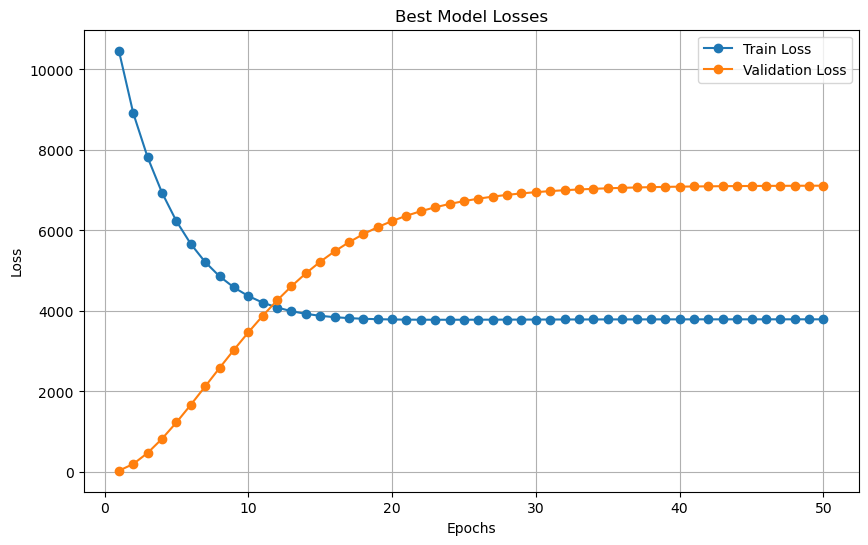

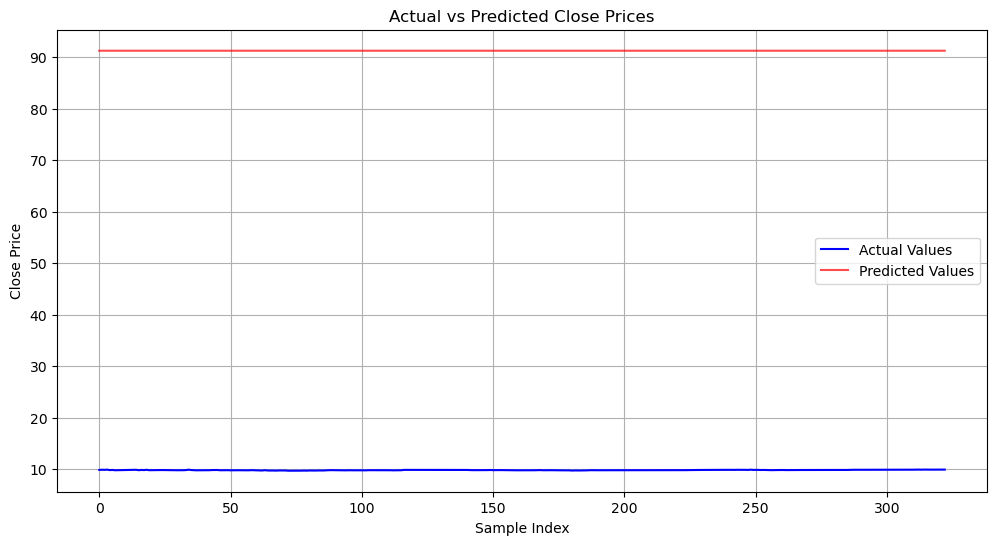

In [ ]:
# # After correction
# import numpy as np
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset
# import matplotlib.pyplot as plt
# import itertools

# # Define the Vanilla RNN model
# class VanillaRNN(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(VanillaRNN, self).__init__()
#         self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         out, _ = self.rnn(x)
#         return self.fc(out[:, -1, :])  # Extract the output from the last time step

# # Load data
# def load_data(file_path, feature_key, target_key):
#     data = np.load(file_path)
#     X = torch.tensor(data[feature_key], dtype=torch.float32)  # Feature data
#     y = torch.tensor(data[target_key], dtype=torch.float32).unsqueeze(1)  # Target data
#     return X, y

# # Train the model
# def train_model(model, dataloader, criterion, optimizer, device):
#     model.train()
#     total_loss = 0
#     for X_batch, y_batch in dataloader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         optimizer.zero_grad()
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()
#     return total_loss / len(dataloader)

# # Validate the model
# def validate_model(model, dataloader, criterion, device):
#     model.eval()
#     total_loss = 0
#     with torch.no_grad():
#         for X_batch, y_batch in dataloader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             outputs = model(X_batch)
#             loss = criterion(outputs, y_batch)
#             total_loss += loss.item()
#     return total_loss / len(dataloader)

# # Plot training and validation losses
# def plot_losses(train_losses, val_losses, title="Training and Validation Loss"):
#     plt.figure(figsize=(10, 6))
#     plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss', marker='o')
#     plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.title(title)
#     plt.legend()
#     plt.grid()
#     plt.show()

# # Main script
# def main():
#     train_path = "Train_Time_Series.npz"
#     val_path = "Validation_Time_Series.npz"
#     test_path = "Test_Time_Series.npz"

#     # Hyperparameters
#     learning_rates = [0.01, 0.001]
#     hidden_sizes = [32, 64]
#     batch_sizes = [16, 32]
#     epochs = 50

#     # Device
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#     # Load train and validation data
#     X_train, y_train = load_data(train_path, "x_train", "y_train")
#     X_val, y_val = load_data(val_path, "x_val", "y_val")

#     # Initialize best model tracking
#     best_val_loss = float('inf')
#     best_model_state = None
#     best_params = None

#     # Hyperparameter search
#     for lr, hidden_size, batch_size in itertools.product(learning_rates, hidden_sizes, batch_sizes):
#         print(f"\nTraining with Learning Rate={lr}, Hidden Size={hidden_size}, Batch Size={batch_size}")

#         # Initialize model
#         model = VanillaRNN(input_size=6, hidden_size=hidden_size, output_size=1).to(device)
#         criterion = nn.MSELoss()
#         optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#         train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=False)
#         val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)

#         # Train model
#         train_losses, val_losses = [], []
#         for epoch in range(epochs):
#             train_loss = train_model(model, train_loader, criterion, optimizer, device)
#             val_loss = validate_model(model, val_loader, criterion, device)
#             train_losses.append(train_loss)
#             val_losses.append(val_loss)
#             print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}")

#         # Save the best model
#         if val_losses[-1] < best_val_loss:
#             best_val_loss = val_losses[-1]
#             best_model_state = model.state_dict()
#             best_params = (lr, hidden_size, batch_size)

#     # Load best model
#     best_lr, best_hidden_size, best_batch_size = best_params
#     best_model = VanillaRNN(input_size=6, hidden_size=best_hidden_size, output_size=1).to(device)
#     best_model.load_state_dict(best_model_state)

#     # Plot training and validation losses for the best model
#     plot_losses(train_losses, val_losses, title="Best Model Losses")

#     # Test the model
#     X_test, y_test = load_data(test_path, "x_test", "y_test")
#     test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=1, shuffle=False)

#     predictions, actual = [], []
#     best_model.eval()
#     with torch.no_grad():
#         for X_batch, y_batch in test_loader:
#             X_batch = X_batch.to(device)
#             output = best_model(X_batch).cpu().numpy()
#             predictions.append(output[0][0])
#             actual.append(y_batch.numpy()[0][0])

#     # Plot predictions
#     plt.figure(figsize=(12, 6))
#     plt.plot(actual, label='Actual Values', color='blue')
#     plt.plot(predictions, label='Predicted Values', color='red', alpha=0.7)
#     plt.xlabel('Sample Index')
#     plt.ylabel('Close Price')
#     plt.title("Actual vs Predicted Close Prices")
#     plt.legend()
#     plt.grid()
#     plt.show()

# if __name__ == "__main__":
#     main()


## GRU

Epoch 1/20, Train Loss: 0.003279, Validation Loss: 0.005741
Epoch 2/20, Train Loss: 0.000264, Validation Loss: 0.003799
Epoch 3/20, Train Loss: 0.000201, Validation Loss: 0.002922
Epoch 4/20, Train Loss: 0.000173, Validation Loss: 0.002191
Epoch 5/20, Train Loss: 0.000145, Validation Loss: 0.001779
Epoch 6/20, Train Loss: 0.000136, Validation Loss: 0.001475
Epoch 7/20, Train Loss: 0.000114, Validation Loss: 0.001126
Epoch 8/20, Train Loss: 0.000100, Validation Loss: 0.001080
Epoch 9/20, Train Loss: 0.000117, Validation Loss: 0.001131
Epoch 10/20, Train Loss: 0.000090, Validation Loss: 0.000805
Epoch 11/20, Train Loss: 0.000082, Validation Loss: 0.000798
Epoch 12/20, Train Loss: 0.000096, Validation Loss: 0.000775
Epoch 13/20, Train Loss: 0.000086, Validation Loss: 0.000923
Epoch 14/20, Train Loss: 0.000088, Validation Loss: 0.000728
Epoch 15/20, Train Loss: 0.000088, Validation Loss: 0.000733
Epoch 16/20, Train Loss: 0.000085, Validation Loss: 0.000660
Epoch 17/20, Train Loss: 0.000094

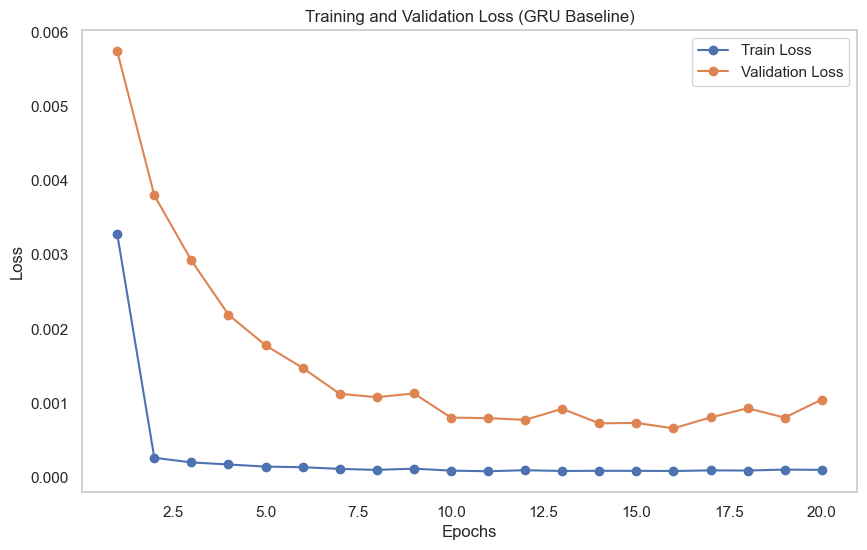

In [78]:
# Baseline Model
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)

# Define the GRU model
class StockPredictorGRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(StockPredictorGRU, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        return self.fc(out[:, -1, :])  # Take the output of the last time step

# Set model parameters
input_size = X_train.shape[2]  # Number of features
hidden_size = 64               # Number of hidden units
output_size = 1                # Predict one value
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model, loss function, and optimizer
model = StockPredictorGRU(input_size, hidden_size, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training and validation functions
def train_model(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def validate_model(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()
    return total_loss / len(dataloader)

# Train the model
epochs = 20
train_losses, val_losses = [], []

for epoch in range(epochs):
    train_loss = train_model(model, train_loader, criterion, optimizer, device)
    val_loss = validate_model(model, val_loader, criterion, device)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}")

# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (GRU Baseline)')
plt.legend()
plt.grid()
plt.show()



Testing combination: lr=0.01, hidden_size=32, batch_size=16
Epoch 1/40: Train Loss = 0.002450, Validation Loss = 0.009406
Epoch 2/40: Train Loss = 0.000780, Validation Loss = 0.018756
Epoch 3/40: Train Loss = 0.000499, Validation Loss = 0.004164
Epoch 4/40: Train Loss = 0.000293, Validation Loss = 0.004755
Epoch 5/40: Train Loss = 0.000368, Validation Loss = 0.003866
Epoch 6/40: Train Loss = 0.000369, Validation Loss = 0.005259
Epoch 7/40: Train Loss = 0.000210, Validation Loss = 0.002531
Epoch 8/40: Train Loss = 0.000337, Validation Loss = 0.002551
Epoch 9/40: Train Loss = 0.000528, Validation Loss = 0.003593
Epoch 10/40: Train Loss = 0.000366, Validation Loss = 0.003312
Epoch 11/40: Train Loss = 0.000418, Validation Loss = 0.003612
Epoch 12/40: Train Loss = 0.000210, Validation Loss = 0.003860
Epoch 13/40: Train Loss = 0.000338, Validation Loss = 0.005855
Epoch 14/40: Train Loss = 0.000459, Validation Loss = 0.006050
Epoch 15/40: Train Loss = 0.000340, Validation Loss = 0.004853
Epo

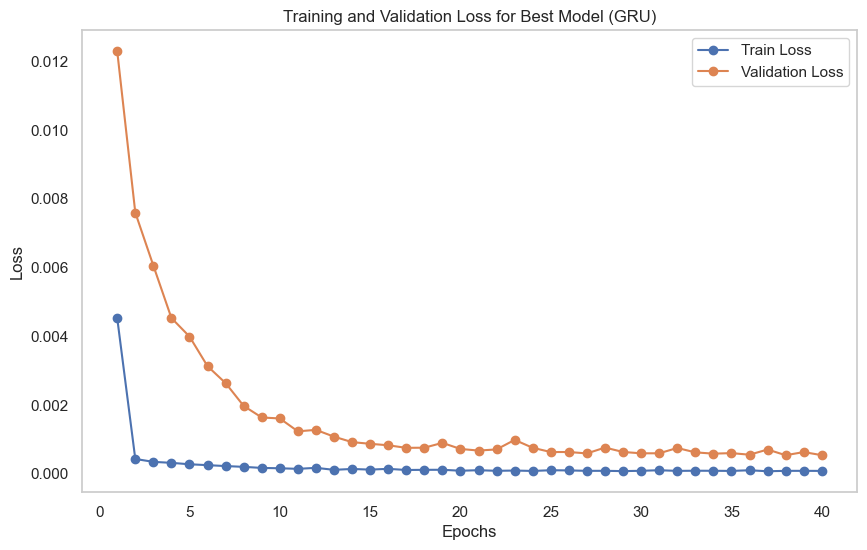

Best GRU model saved to best_stock_predictor_gru.pth


In [ ]:
# Tuning the Hyperparameters
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from itertools import product

# Hyperparameter grid
learning_rates = [0.01, 0.05, 0.001]
hidden_sizes = [32, 64, 128]
batch_sizes = [16, 32]

# Prepare sequences
def prepare_sequences(data, target_column, sequence_length=30):
    features = data.drop(columns=[target_column, 'Date']).values
    target = data[target_column].values
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(features[i:i + sequence_length])
        y.append(target[i + sequence_length])
    return np.array(X), np.array(y)

# Prepare data
X, y = prepare_sequences(cleaned_data, target_column='Close', sequence_length=30)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Split into training and validation sets
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Define GRU model
class StockPredictorGRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(StockPredictorGRU, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        return self.fc(out[:, -1, :])  # Take the output of the last time step

# Training and validation functions
def train_model(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def validate_model(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()
    return total_loss / len(dataloader)

# Hyperparameter tuning
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = X_train.shape[2]
output_size = 1
epochs = 40  # Set to 40 epochs
best_params = None
best_val_loss = float('inf')
best_model = None

results = []

for lr, hidden_size, batch_size in product(learning_rates, hidden_sizes, batch_sizes):
    print(f"\nTesting combination: lr={lr}, hidden_size={hidden_size}, batch_size={batch_size}")
    
    # Prepare DataLoaders
    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)
    
    # Initialize model, criterion, and optimizer
    model = StockPredictorGRU(input_size, hidden_size, output_size).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    # Train the model
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        train_loss = train_model(model, train_loader, criterion, optimizer, device)
        val_loss = validate_model(model, val_loader, criterion, device)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{epochs}: Train Loss = {train_loss:.6f}, Validation Loss = {val_loss:.6f}")
    
    # Save results
    avg_val_loss = np.mean(val_losses[-5:])  # Average validation loss of the last 5 epochs
    results.append((lr, hidden_size, batch_size, train_losses, val_losses, avg_val_loss))
    
    # Check for the best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_params = (lr, hidden_size, batch_size)
        best_model = model
        best_train_losses = train_losses
        best_val_losses = val_losses

    print(f"Validation Loss for combination lr={lr}, hidden_size={hidden_size}, batch_size={batch_size}: {avg_val_loss:.6f}")

# Print best parameters
print(f"\nBest Parameters: lr={best_params[0]}, hidden_size={best_params[1]}, batch_size={best_params[2]}")
print(f"Best Validation Loss: {best_val_loss:.6f}")

# Plot the training and validation loss of the best model
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), best_train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), best_val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Best Model (GRU)')
plt.legend()
plt.grid()
plt.show()

# Save the best model
model_save_path = "best_stock_predictor_gru.pth"
torch.save(best_model.state_dict(), model_save_path)
print(f"Best GRU model saved to {model_save_path}")



Training with Learning Rate=0.01, Hidden Size=32, Batch Size=16
Epoch 1/50, Train Loss: 7836.694915, Validation Loss: 2047.886983
Epoch 2/50, Train Loss: 4251.758203, Validation Loss: 5189.811605
Epoch 3/50, Train Loss: 3768.204916, Validation Loss: 6481.969238
Epoch 4/50, Train Loss: 3753.070912, Validation Loss: 6568.101318
Epoch 5/50, Train Loss: 3744.054715, Validation Loss: 6808.859619
Epoch 6/50, Train Loss: 3747.090292, Validation Loss: 6553.502279
Epoch 7/50, Train Loss: 3737.577293, Validation Loss: 6834.025716
Epoch 8/50, Train Loss: 3743.270644, Validation Loss: 6854.983561
Epoch 9/50, Train Loss: 3740.644810, Validation Loss: 6536.670736
Epoch 10/50, Train Loss: 3739.688004, Validation Loss: 6586.915039
Epoch 11/50, Train Loss: 3739.836778, Validation Loss: 6745.760010
Epoch 12/50, Train Loss: 3747.640203, Validation Loss: 6760.948161
Epoch 13/50, Train Loss: 3741.773330, Validation Loss: 6745.821208
Epoch 14/50, Train Loss: 3757.810967, Validation Loss: 6756.797852
Epoch 

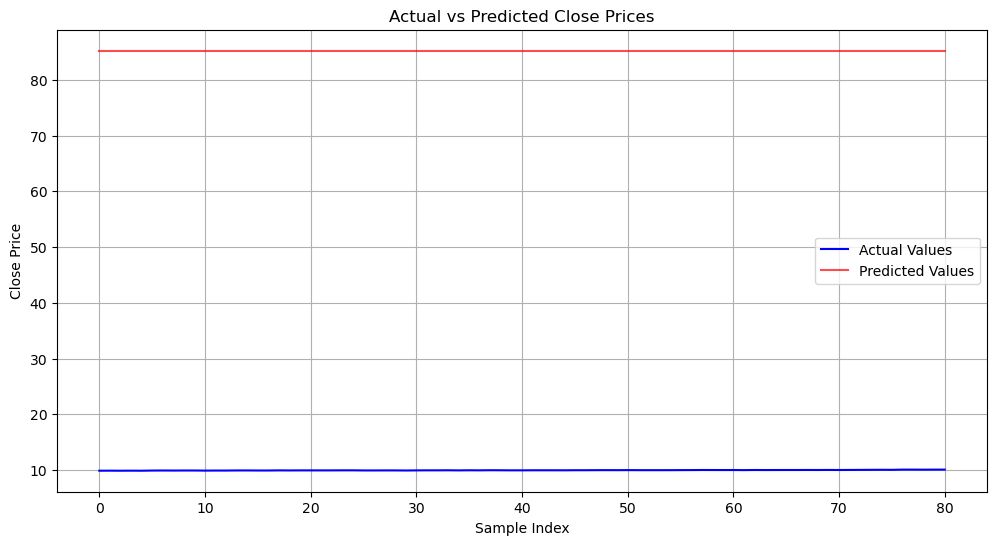

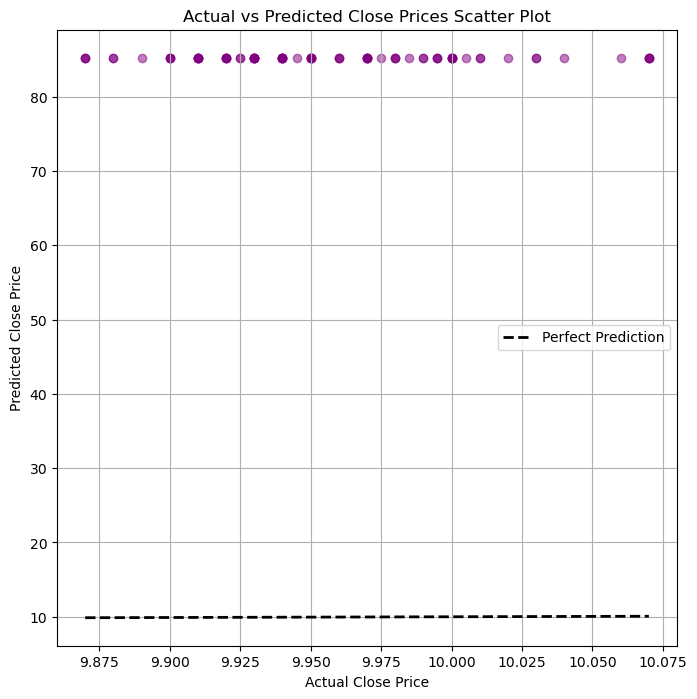


All Hyperparameter Combinations and their Validation Losses:
LR: 0.01, Hidden Size: 32, Batch Size: 16, Train Loss: 3742.366255, Val Loss: 6620.337321
LR: 0.01, Hidden Size: 32, Batch Size: 32, Train Loss: 3743.133453, Val Loss: 6858.312012
LR: 0.01, Hidden Size: 64, Batch Size: 16, Train Loss: 3746.730141, Val Loss: 7120.179118
LR: 0.01, Hidden Size: 64, Batch Size: 32, Train Loss: 3743.350956, Val Loss: 7048.564290
LR: 0.01, Hidden Size: 128, Batch Size: 16, Train Loss: 3749.435752, Val Loss: 6416.691406
LR: 0.01, Hidden Size: 128, Batch Size: 32, Train Loss: 3747.053936, Val Loss: 6408.732259
LR: 0.05, Hidden Size: 32, Batch Size: 16, Train Loss: 3743.518614, Val Loss: 6980.328206
LR: 0.05, Hidden Size: 32, Batch Size: 32, Train Loss: 3744.283967, Val Loss: 6744.120117
LR: 0.05, Hidden Size: 64, Batch Size: 16, Train Loss: 3752.994917, Val Loss: 6373.891276
LR: 0.05, Hidden Size: 64, Batch Size: 32, Train Loss: 3744.826752, Val Loss: 6343.609212
LR: 0.05, Hidden Size: 128, Batch Si

In [ ]:
# import numpy as np
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset
# import matplotlib.pyplot as plt
# import itertools
# import os

# # Define the GRU model
# class GRUModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(GRUModel, self).__init__()
#         self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         out, _ = self.gru(x)
#         return self.fc(out[:, -1, :])  # Extract the output from the last time step

# # Define the training function
# def train_model(model, dataloader, criterion, optimizer, device):
#     model.train()
#     total_loss = 0
#     for X_batch, y_batch in dataloader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         optimizer.zero_grad()
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()
#     return total_loss / len(dataloader)

# # Define the validation function
# def validate_model(model, dataloader, criterion, device):
#     model.eval()
#     total_loss = 0
#     with torch.no_grad():
#         for X_batch, y_batch in dataloader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             outputs = model(X_batch)
#             loss = criterion(outputs, y_batch)
#             total_loss += loss.item()
#     return total_loss / len(dataloader)

# # Set the device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Define hyperparameter grids
# learning_rates = [0.01, 0.05, 0.001]
# hidden_sizes = [32, 64, 128]
# batch_sizes = [16, 32]

# # Create all possible hyperparameter combinations
# hyperparameter_combinations = list(itertools.product(learning_rates, hidden_sizes, batch_sizes))

# # Initialize a list to store the results
# results = []

# # Initialize variables to track the best model
# best_val_loss = float('inf')
# best_result = None
# best_model_state = None

# # Create a directory to save loss plots
# os.makedirs("loss_plots", exist_ok=True)

# # Iterate over each hyperparameter combination
# for lr, hidden_size, batch_size in hyperparameter_combinations:
#     print(f"\nTraining with Learning Rate={lr}, Hidden Size={hidden_size}, Batch Size={batch_size}")
    
#     # Load the training data
#     train_data = np.load("Train_Time_Series.npz")
#     X_train = torch.tensor(train_data['x_train'], dtype=torch.float32)
#     y_train = torch.tensor(train_data['y_train'], dtype=torch.float32).unsqueeze(1)
    
#     # Load the validation data
#     val_data = np.load("Validation_Time_Series.npz")
#     X_val = torch.tensor(val_data['x_val'], dtype=torch.float32)
#     y_val = torch.tensor(val_data['y_val'], dtype=torch.float32).unsqueeze(1)
    
#     # Create DataLoaders with the current batch size
#     train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
#     val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)
    
#     # Initialize the model with the current hidden size
#     input_size = X_train.shape[2]  # Number of input features
#     output_size = 1                # Output dimension
#     model = GRUModel(input_size, hidden_size, output_size).to(device)
    
#     # Define the loss function and optimizer with the current learning rate
#     criterion = nn.MSELoss()
#     optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
#     # Set the number of epochs
#     epochs = 50
#     train_losses, val_losses = [], []
    
#     # Train the model for the specified number of epochs
#     for epoch in range(epochs):
#         train_loss = train_model(model, train_loader, criterion, optimizer, device)
#         val_loss = validate_model(model, val_loader, criterion, device)
#         train_losses.append(train_loss)
#         val_losses.append(val_loss)
#         print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}")
    
#     # Record the final validation loss for this combination
#     final_val_loss = val_losses[-1]
#     results.append({
#         'learning_rate': lr,
#         'hidden_size': hidden_size,
#         'batch_size': batch_size,
#         'train_loss': train_losses[-1],
#         'val_loss': final_val_loss,
#         'train_losses': train_losses,
#         'val_losses': val_losses
#     })
    
#     # Check if this is the best model so far
#     if final_val_loss < best_val_loss:
#         best_val_loss = final_val_loss
#         best_result = {
#             'learning_rate': lr,
#             'hidden_size': hidden_size,
#             'batch_size': batch_size,
#             'train_loss': train_losses[-1],
#             'val_loss': final_val_loss,
#             'train_losses': train_losses,
#             'val_losses': val_losses
#         }
#         best_model_state = model.state_dict()
    
#     # Plot the training and validation loss curves
#     plt.figure(figsize=(10, 6))
#     plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o')
#     plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', marker='o')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.title(f'Train and Validation Loss\nLR={lr}, Hidden Size={hidden_size}, Batch Size={batch_size}')
#     plt.legend()
#     plt.grid()
#     plot_filename = f"loss_plots/loss_lr{lr}_hidden{hidden_size}_batch{batch_size}.png"
#     plt.savefig(plot_filename)
#     plt.close()
#     print(f"Saved loss plot to '{plot_filename}'")

# # Display the best hyperparameter combination
# print("\nBest Hyperparameter Combination:")
# print(f"Learning Rate: {best_result['learning_rate']}")
# print(f"Hidden Size: {best_result['hidden_size']}")
# print(f"Batch Size: {best_result['batch_size']}")
# print(f"Training Loss: {best_result['train_loss']:.6f}")
# print(f"Validation Loss: {best_result['val_loss']:.6f}")

# # Initialize the best model and load the best state
# best_model = GRUModel(input_size, best_result['hidden_size'], output_size).to(device)
# best_model.load_state_dict(best_model_state)
# best_model.eval()

# # Load the validation data again for prediction
# val_data = np.load("Validation_Time_Series.npz")
# X_val = torch.tensor(val_data['x_val'], dtype=torch.float32).to(device)
# y_val = torch.tensor(val_data['y_val'], dtype=torch.float32).unsqueeze(1).cpu().numpy()

# # Make predictions on the validation set
# with torch.no_grad():
#     predictions = best_model(X_val).cpu().numpy()

# # Flatten the arrays for plotting
# predictions = predictions.flatten()
# actual = y_val.flatten()

# # Plot the actual vs predicted values as a line plot
# plt.figure(figsize=(12, 6))
# plt.plot(actual, label='Actual Values', color='blue')
# plt.plot(predictions, label='Predicted Values', color='red', alpha=0.7)
# plt.xlabel('Sample Index')
# plt.ylabel('Close Price')  # Adjust this label based on your actual target variable
# plt.title('Actual vs Predicted Close Prices')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Optionally, plot a scatter plot with a reference line y=x for better comparison
# plt.figure(figsize=(8, 8))
# plt.scatter(actual, predictions, alpha=0.5, color='purple')
# plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2, label='Perfect Prediction')
# plt.xlabel('Actual Close Price')
# plt.ylabel('Predicted Close Price')
# plt.title('Actual vs Predicted Close Prices Scatter Plot')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Display all hyperparameter combinations and their validation losses
# print("\nAll Hyperparameter Combinations and their Validation Losses:")
# for res in results:
#     print(f"LR: {res['learning_rate']}, Hidden Size: {res['hidden_size']}, Batch Size: {res['batch_size']}, Train Loss: {res['train_loss']:.6f}, Val Loss: {res['val_loss']:.6f}")



Training with Learning Rate=0.01, Hidden Size=32, Batch Size=16
Epoch 1/50, Train Loss: 6179.337958, Validation Loss: 2573.573608
Epoch 2/50, Train Loss: 4088.656827, Validation Loss: 4887.846598
Epoch 3/50, Train Loss: 3721.569137, Validation Loss: 6497.898356
Epoch 4/50, Train Loss: 3703.930740, Validation Loss: 7464.540690
Epoch 5/50, Train Loss: 3748.657990, Validation Loss: 7999.775391
Epoch 6/50, Train Loss: 3786.955271, Validation Loss: 8283.371419
Epoch 7/50, Train Loss: 3810.598011, Validation Loss: 8430.183105
Epoch 8/50, Train Loss: 3823.660566, Validation Loss: 8505.332357
Epoch 9/50, Train Loss: 3830.537765, Validation Loss: 8543.675130
Epoch 10/50, Train Loss: 3834.087551, Validation Loss: 8563.271159
Epoch 11/50, Train Loss: 3835.902794, Validation Loss: 8573.367188
Epoch 12/50, Train Loss: 3836.834375, Validation Loss: 8578.620768
Epoch 13/50, Train Loss: 3837.316078, Validation Loss: 8581.396647
Epoch 14/50, Train Loss: 3837.566309, Validation Loss: 8582.903646
Epoch 

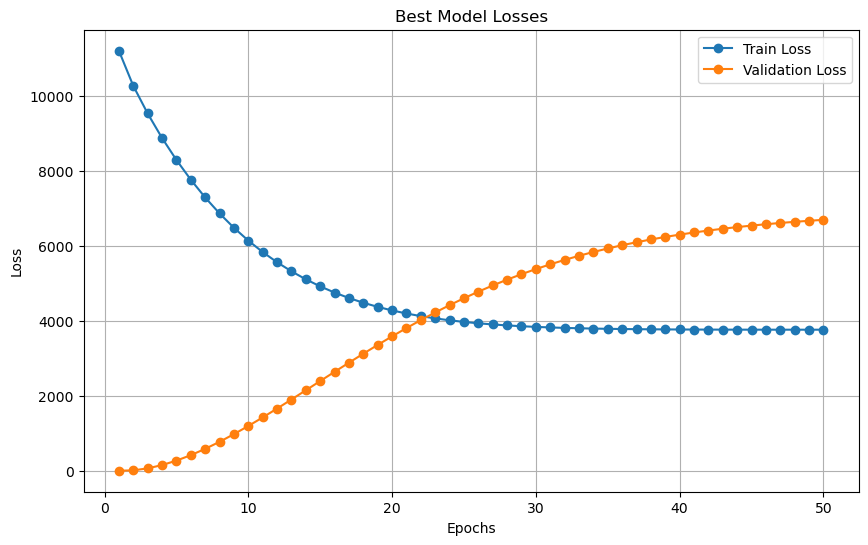

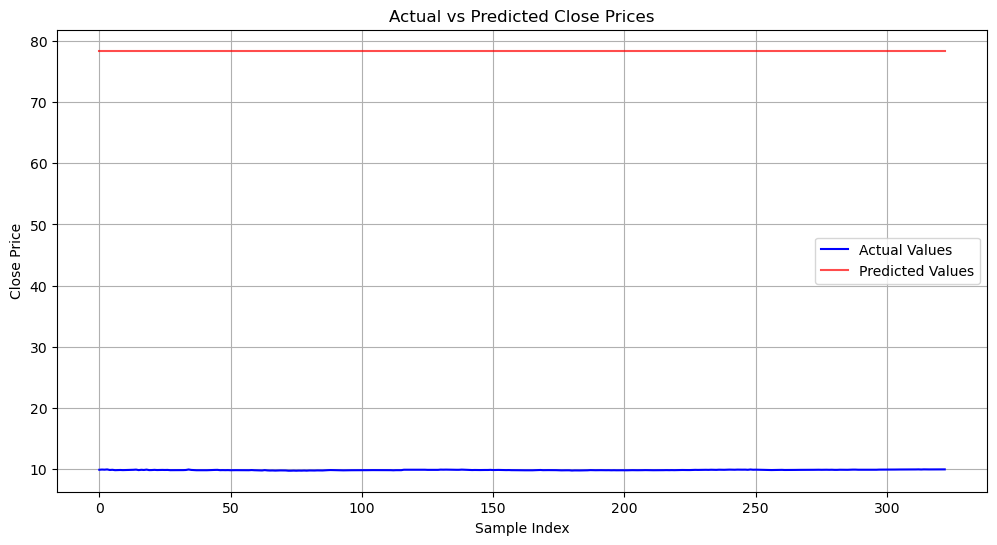

In [ ]:
# # After correction
# import numpy as np
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset
# import matplotlib.pyplot as plt
# import itertools

# # Define the GRU model
# class GRUModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(GRUModel, self).__init__()
#         self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         out, _ = self.gru(x)
#         return self.fc(out[:, -1, :])  # Extract the output from the last time step

# # Load data
# def load_data(file_path, feature_key, target_key):
#     data = np.load(file_path)
#     X = torch.tensor(data[feature_key], dtype=torch.float32)  # Feature data
#     y = torch.tensor(data[target_key], dtype=torch.float32).unsqueeze(1)  # Target data
#     return X, y

# # Train the model
# def train_model(model, dataloader, criterion, optimizer, device):
#     model.train()
#     total_loss = 0
#     for X_batch, y_batch in dataloader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         optimizer.zero_grad()
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()
#     return total_loss / len(dataloader)

# # Validate the model
# def validate_model(model, dataloader, criterion, device):
#     model.eval()
#     total_loss = 0
#     with torch.no_grad():
#         for X_batch, y_batch in dataloader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             outputs = model(X_batch)
#             loss = criterion(outputs, y_batch)
#             total_loss += loss.item()
#     return total_loss / len(dataloader)

# # Plot training and validation losses
# def plot_losses(train_losses, val_losses, title="Training and Validation Loss"):
#     plt.figure(figsize=(10, 6))
#     plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss', marker='o')
#     plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.title(title)
#     plt.legend()
#     plt.grid()
#     plt.show()

# # Main script
# def main():
#     train_path = "Train_Time_Series.npz"
#     val_path = "Validation_Time_Series.npz"
#     test_path = "Test_Time_Series.npz"

#     # Hyperparameters
#     learning_rates = [0.01, 0.001]
#     hidden_sizes = [32, 64]
#     batch_sizes = [16, 32]
#     epochs = 50

#     # Device
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#     # Load train and validation data
#     X_train, y_train = load_data(train_path, "x_train", "y_train")
#     X_val, y_val = load_data(val_path, "x_val", "y_val")

#     # Initialize best model tracking
#     best_val_loss = float('inf')
#     best_model_state = None
#     best_params = None

#     # Hyperparameter search
#     for lr, hidden_size, batch_size in itertools.product(learning_rates, hidden_sizes, batch_sizes):
#         print(f"\nTraining with Learning Rate={lr}, Hidden Size={hidden_size}, Batch Size={batch_size}")

#         # Initialize GRU model
#         model = GRUModel(input_size=6, hidden_size=hidden_size, output_size=1).to(device)
#         criterion = nn.MSELoss()
#         optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#         train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=False)
#         val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)

#         # Train model
#         train_losses, val_losses = [], []
#         for epoch in range(epochs):
#             train_loss = train_model(model, train_loader, criterion, optimizer, device)
#             val_loss = validate_model(model, val_loader, criterion, device)
#             train_losses.append(train_loss)
#             val_losses.append(val_loss)
#             print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}")

#         # Save the best model
#         if val_losses[-1] < best_val_loss:
#             best_val_loss = val_losses[-1]
#             best_model_state = model.state_dict()
#             best_params = (lr, hidden_size, batch_size)

#     # Load best model
#     best_lr, best_hidden_size, best_batch_size = best_params
#     best_model = GRUModel(input_size=6, hidden_size=best_hidden_size, output_size=1).to(device)
#     best_model.load_state_dict(best_model_state)

#     # Plot training and validation losses for the best model
#     plot_losses(train_losses, val_losses, title="Best Model Losses")

#     # Test the model
#     X_test, y_test = load_data(test_path, "x_test", "y_test")
#     test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=1, shuffle=False)

#     predictions, actual = [], []
#     best_model.eval()
#     with torch.no_grad():
#         for X_batch, y_batch in test_loader:
#             X_batch = X_batch.to(device)
#             output = best_model(X_batch).cpu().numpy()
#             predictions.append(output[0][0])
#             actual.append(y_batch.numpy()[0][0])

#     # Plot predictions
#     plt.figure(figsize=(12, 6))
#     plt.plot(actual, label='Actual Values', color='blue')
#     plt.plot(predictions, label='Predicted Values', color='red', alpha=0.7)
#     plt.xlabel('Sample Index')
#     plt.ylabel('Close Price')
#     plt.title("Actual vs Predicted Close Prices")
#     plt.legend()
#     plt.grid()
#     plt.show()

# if __name__ == "__main__":
#     main()



## LSTM

Epoch 1/20, Train Loss: 0.021302, Validation Loss: 0.010536
Epoch 2/20, Train Loss: 0.000230, Validation Loss: 0.006214
Epoch 3/20, Train Loss: 0.000142, Validation Loss: 0.004728
Epoch 4/20, Train Loss: 0.000116, Validation Loss: 0.003669
Epoch 5/20, Train Loss: 0.000105, Validation Loss: 0.003011
Epoch 6/20, Train Loss: 0.000106, Validation Loss: 0.002644
Epoch 7/20, Train Loss: 0.000086, Validation Loss: 0.002440
Epoch 8/20, Train Loss: 0.000088, Validation Loss: 0.002202
Epoch 9/20, Train Loss: 0.000081, Validation Loss: 0.001968
Epoch 10/20, Train Loss: 0.000093, Validation Loss: 0.001818
Epoch 11/20, Train Loss: 0.000079, Validation Loss: 0.001662
Epoch 12/20, Train Loss: 0.000083, Validation Loss: 0.001490
Epoch 13/20, Train Loss: 0.000095, Validation Loss: 0.001716
Epoch 14/20, Train Loss: 0.000077, Validation Loss: 0.001293
Epoch 15/20, Train Loss: 0.000077, Validation Loss: 0.001417
Epoch 16/20, Train Loss: 0.000077, Validation Loss: 0.001213
Epoch 17/20, Train Loss: 0.000073

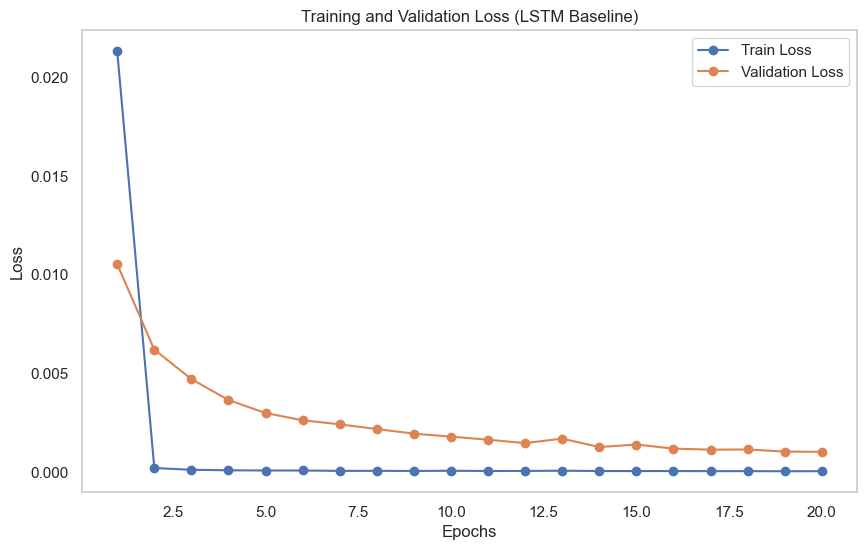

In [77]:
# Baseline Model
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)

# Define the LSTM model
class StockPredictorLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(StockPredictorLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])  # Take the output of the last time step

# Set model parameters
input_size = X_train.shape[2]  # Number of features
hidden_size = 64               # Number of hidden units
output_size = 1                # Predict one value
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model, loss function, and optimizer
model = StockPredictorLSTM(input_size, hidden_size, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training and validation functions
def train_model(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def validate_model(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()
    return total_loss / len(dataloader)

# Train the model
epochs = 20
train_losses, val_losses = [], []

for epoch in range(epochs):
    train_loss = train_model(model, train_loader, criterion, optimizer, device)
    val_loss = validate_model(model, val_loader, criterion, device)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}")

# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (LSTM Baseline)')
plt.legend()
plt.grid()
plt.show()



Testing combination: lr=0.01, hidden_size=32, batch_size=16
Epoch 1/40: Train Loss = 0.007592, Validation Loss = 0.003799
Epoch 2/40: Train Loss = 0.000177, Validation Loss = 0.003347
Epoch 3/40: Train Loss = 0.000213, Validation Loss = 0.003005
Epoch 4/40: Train Loss = 0.000171, Validation Loss = 0.002714
Epoch 5/40: Train Loss = 0.000141, Validation Loss = 0.001759
Epoch 6/40: Train Loss = 0.000134, Validation Loss = 0.002085
Epoch 7/40: Train Loss = 0.000230, Validation Loss = 0.001973
Epoch 8/40: Train Loss = 0.000277, Validation Loss = 0.003867
Epoch 9/40: Train Loss = 0.000230, Validation Loss = 0.003679
Epoch 10/40: Train Loss = 0.000145, Validation Loss = 0.001832
Epoch 11/40: Train Loss = 0.000219, Validation Loss = 0.003056
Epoch 12/40: Train Loss = 0.000142, Validation Loss = 0.002226
Epoch 13/40: Train Loss = 0.000190, Validation Loss = 0.002718
Epoch 14/40: Train Loss = 0.000156, Validation Loss = 0.001956
Epoch 15/40: Train Loss = 0.000181, Validation Loss = 0.002428
Epo

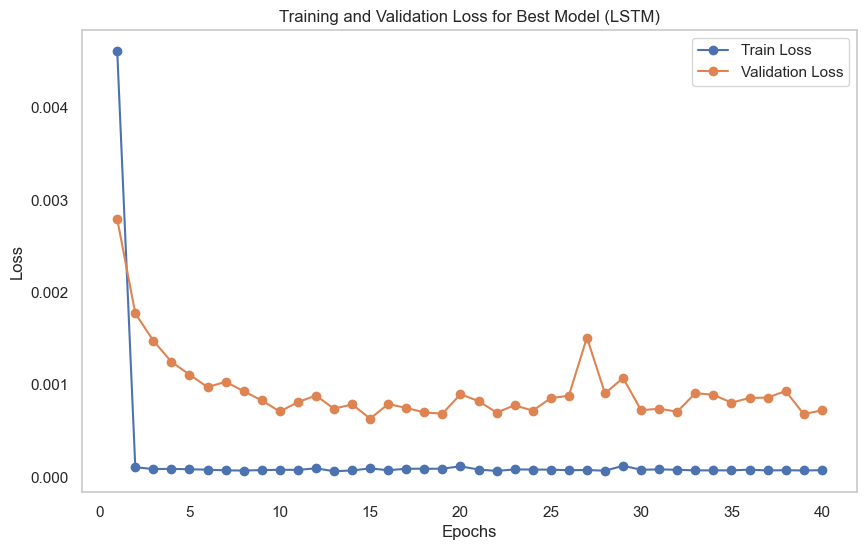

Best LSTM model saved to best_stock_predictor_lstm.pth


In [76]:
# Tuning the Hypermeters
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from itertools import product

# Hyperparameter grid
learning_rates = [0.01, 0.05, 0.001]
hidden_sizes = [32, 64, 128]
batch_sizes = [16, 32]

# Prepare sequences
def prepare_sequences(data, target_column, sequence_length=30):
    features = data.drop(columns=[target_column, 'Date']).values
    target = data[target_column].values
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(features[i:i + sequence_length])
        y.append(target[i + sequence_length])
    return np.array(X), np.array(y)

# Prepare data
X, y = prepare_sequences(cleaned_data, target_column='Close', sequence_length=30)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Split into training and validation sets
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Define LSTM model
class StockPredictorLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(StockPredictorLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])  # Take the output of the last time step

# Training and validation functions
def train_model(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def validate_model(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()
    return total_loss / len(dataloader)

# Hyperparameter tuning
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = X_train.shape[2]
output_size = 1
epochs = 40  # Set to 40 epochs
best_params = None
best_val_loss = float('inf')
best_model = None

results = []

for lr, hidden_size, batch_size in product(learning_rates, hidden_sizes, batch_sizes):
    print(f"\nTesting combination: lr={lr}, hidden_size={hidden_size}, batch_size={batch_size}")
    
    # Prepare DataLoaders
    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)
    
    # Initialize model, criterion, and optimizer
    model = StockPredictorLSTM(input_size, hidden_size, output_size).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    # Train the model
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        train_loss = train_model(model, train_loader, criterion, optimizer, device)
        val_loss = validate_model(model, val_loader, criterion, device)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{epochs}: Train Loss = {train_loss:.6f}, Validation Loss = {val_loss:.6f}")
    
    # Save results
    avg_val_loss = np.mean(val_losses[-5:])  # Average validation loss of the last 5 epochs
    results.append((lr, hidden_size, batch_size, train_losses, val_losses, avg_val_loss))
    
    # Check for the best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_params = (lr, hidden_size, batch_size)
        best_model = model
        best_train_losses = train_losses
        best_val_losses = val_losses

    print(f"Validation Loss for combination lr={lr}, hidden_size={hidden_size}, batch_size={batch_size}: {avg_val_loss:.6f}")

# Print best parameters
print(f"\nBest Parameters: lr={best_params[0]}, hidden_size={best_params[1]}, batch_size={best_params[2]}")
print(f"Best Validation Loss: {best_val_loss:.6f}")

# Plot the training and validation loss of the best model
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), best_train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), best_val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Best Model (LSTM)')
plt.legend()
plt.grid()
plt.show()

# Save the best model
model_save_path = "best_stock_predictor_lstm.pth"
torch.save(best_model.state_dict(), model_save_path)
print(f"Best LSTM model saved to {model_save_path}")



Training with Learning Rate=0.01, Hidden Size=32, Batch Size=16
Epoch 1/50, Train Loss: 7922.263518, Validation Loss: 917.175842
Epoch 2/50, Train Loss: 5525.918595, Validation Loss: 2233.748006
Epoch 3/50, Train Loss: 4505.108523, Validation Loss: 3568.406250
Epoch 4/50, Train Loss: 4027.714217, Validation Loss: 4737.933757
Epoch 5/50, Train Loss: 3827.128964, Validation Loss: 5672.655680
Epoch 6/50, Train Loss: 3758.575084, Validation Loss: 6373.467367
Epoch 7/50, Train Loss: 3746.538861, Validation Loss: 6875.516602
Epoch 8/50, Train Loss: 3754.800374, Validation Loss: 7223.760661
Epoch 9/50, Train Loss: 3767.738070, Validation Loss: 7459.923340
Epoch 10/50, Train Loss: 3779.578404, Validation Loss: 7617.584310
Epoch 11/50, Train Loss: 3788.771763, Validation Loss: 7721.758219
Epoch 12/50, Train Loss: 3795.398908, Validation Loss: 7790.094482
Epoch 13/50, Train Loss: 3799.975198, Validation Loss: 7834.719889
Epoch 14/50, Train Loss: 3803.060979, Validation Loss: 7863.790283
Epoch 1

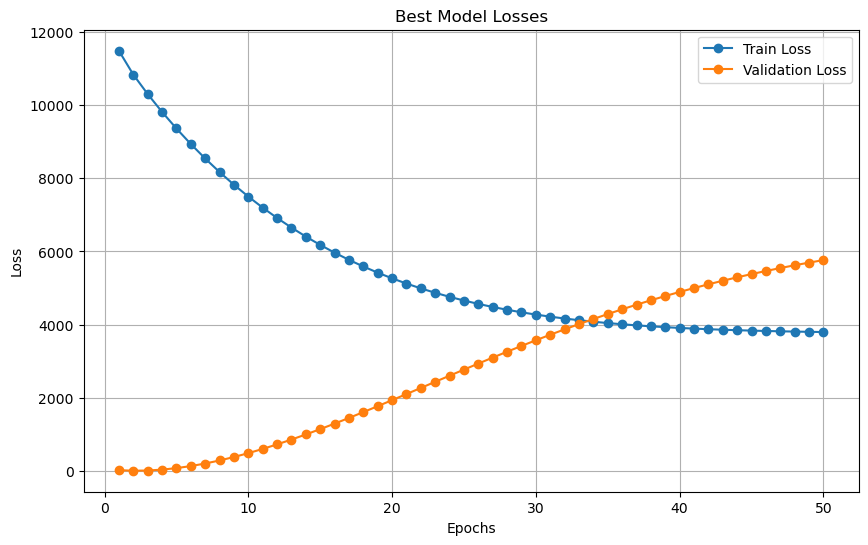

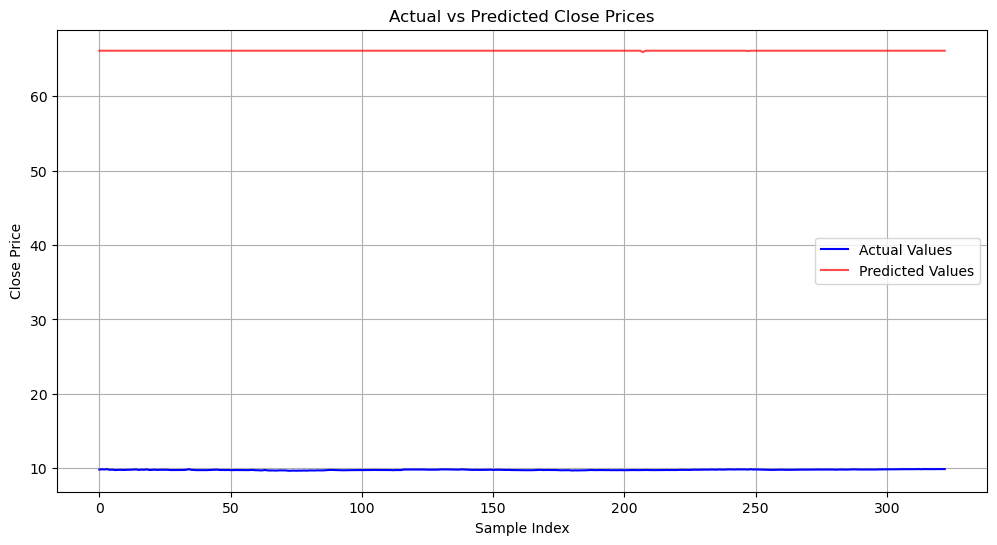

In [ ]:
# import numpy as np
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset
# import matplotlib.pyplot as plt
# import itertools

# # Define the LSTM model
# class LSTMModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(LSTMModel, self).__init__()
#         self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         out, _ = self.lstm(x)
#         return self.fc(out[:, -1, :])  # Extract the output from the last time step

# # Load data
# def load_data(file_path, feature_key, target_key):
#     data = np.load(file_path)
#     X = torch.tensor(data[feature_key], dtype=torch.float32)  # Feature data
#     y = torch.tensor(data[target_key], dtype=torch.float32).unsqueeze(1)  # Target data
#     return X, y

# # Train the model
# def train_model(model, dataloader, criterion, optimizer, device):
#     model.train()
#     total_loss = 0
#     for X_batch, y_batch in dataloader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         optimizer.zero_grad()
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()
#     return total_loss / len(dataloader)

# # Validate the model
# def validate_model(model, dataloader, criterion, device):
#     model.eval()
#     total_loss = 0
#     with torch.no_grad():
#         for X_batch, y_batch in dataloader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             outputs = model(X_batch)
#             loss = criterion(outputs, y_batch)
#             total_loss += loss.item()
#     return total_loss / len(dataloader)

# # Plot training and validation losses
# def plot_losses(train_losses, val_losses, title="Training and Validation Loss"):
#     plt.figure(figsize=(10, 6))
#     plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss', marker='o')
#     plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.title(title)
#     plt.legend()
#     plt.grid()
#     plt.show()

# # Main script
# def main():
#     train_path = "Train_Time_Series.npz"
#     val_path = "Validation_Time_Series.npz"
#     test_path = "Test_Time_Series.npz"

#     # Hyperparameters
#     learning_rates = [0.01, 0.001]
#     hidden_sizes = [32, 64]
#     batch_sizes = [16, 32]
#     epochs = 50

#     # Device
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#     # Load train and validation data
#     X_train, y_train = load_data(train_path, "x_train", "y_train")
#     X_val, y_val = load_data(val_path, "x_val", "y_val")

#     # Initialize best model tracking
#     best_val_loss = float('inf')
#     best_model_state = None
#     best_params = None

#     # Hyperparameter search
#     for lr, hidden_size, batch_size in itertools.product(learning_rates, hidden_sizes, batch_sizes):
#         print(f"\nTraining with Learning Rate={lr}, Hidden Size={hidden_size}, Batch Size={batch_size}")

#         # Initialize LSTM model
#         model = LSTMModel(input_size=6, hidden_size=hidden_size, output_size=1).to(device)
#         criterion = nn.MSELoss()
#         optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#         train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=False)
#         val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)

#         # Train model
#         train_losses, val_losses = [], []
#         for epoch in range(epochs):
#             train_loss = train_model(model, train_loader, criterion, optimizer, device)
#             val_loss = validate_model(model, val_loader, criterion, device)
#             train_losses.append(train_loss)
#             val_losses.append(val_loss)
#             print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}")

#         # Save the best model
#         if val_losses[-1] < best_val_loss:
#             best_val_loss = val_losses[-1]
#             best_model_state = model.state_dict()
#             best_params = (lr, hidden_size, batch_size)

#     # Load best model
#     best_lr, best_hidden_size, best_batch_size = best_params
#     best_model = LSTMModel(input_size=6, hidden_size=best_hidden_size, output_size=1).to(device)
#     best_model.load_state_dict(best_model_state)

#     # Plot training and validation losses for the best model
#     plot_losses(train_losses, val_losses, title="Best Model Losses")

#     # Test the model
#     X_test, y_test = load_data(test_path, "x_test", "y_test")
#     test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=1, shuffle=False)

#     predictions, actual = [], []
#     best_model.eval()
#     with torch.no_grad():
#         for X_batch, y_batch in test_loader:
#             X_batch = X_batch.to(device)
#             output = best_model(X_batch).cpu().numpy()
#             predictions.append(output[0][0])
#             actual.append(y_batch.numpy()[0][0])

#     # Plot predictions
#     plt.figure(figsize=(12, 6))
#     plt.plot(actual, label='Actual Values', color='blue')
#     plt.plot(predictions, label='Predicted Values', color='red', alpha=0.7)
#     plt.xlabel('Sample Index')
#     plt.ylabel('Close Price')
#     plt.title("Actual vs Predicted Close Prices")
#     plt.legend()
#     plt.grid()
#     plt.show()

# if __name__ == "__main__":
#     main()


## Test Part

Evaluating Best RNN Model...
Test Loss (MSE): 0.6776, Test MSE: 0.6776, R² Score: -29.5036


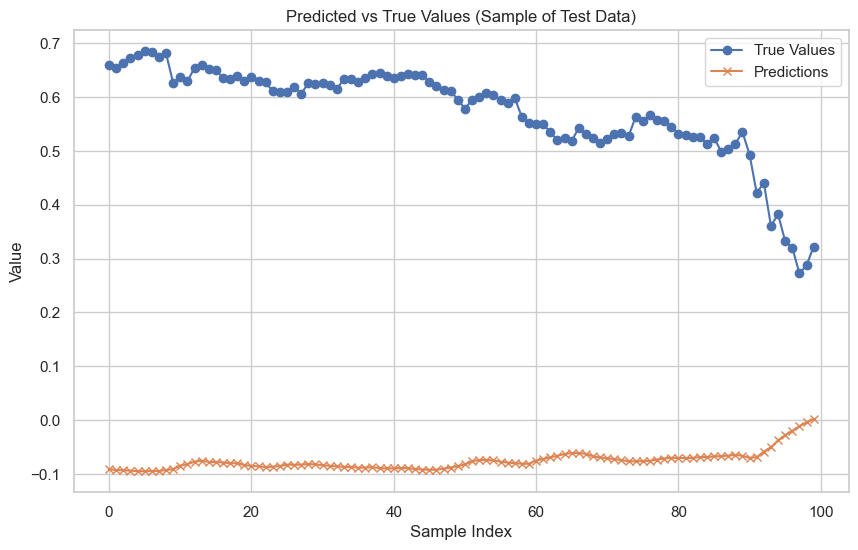

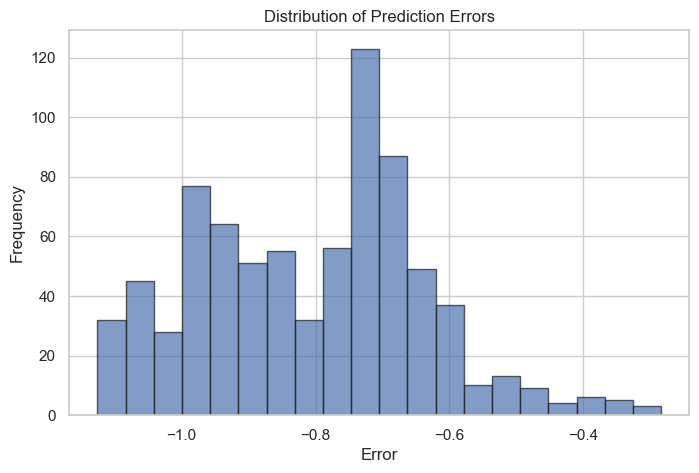

Best RNN Model: Test Loss = 0.6776


In [89]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the RNN model class
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Load test data
def load_test_data(file_path):
    test_data = np.load(file_path)
    X_test = test_data["X"]
    y_test = test_data["y"]
    return X_test, y_test

# Evaluate the model
def evaluate_model(model_path, X_test, y_test, input_size, hidden_size, output_size):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = RNNModel(input_size, hidden_size, output_size).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
    criterion = nn.MSELoss()
    with torch.no_grad():
        predictions = model(X_test_tensor)
        test_loss = criterion(predictions, y_test_tensor).item()
        predictions = predictions.cpu().numpy()
        y_test = y_test_tensor.cpu().numpy()
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
    print(f"Test Loss (MSE): {test_loss:.4f}, Test MSE: {mse:.4f}, R² Score: {r2:.4f}")
    
    # Visualization: Predicted vs True Values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test[:100], label='True Values', marker='o')
    plt.plot(predictions[:100], label='Predictions', marker='x')
    plt.legend()
    plt.title("Predicted vs True Values (Sample of Test Data)")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.show()

    # Visualization: Distribution of Prediction Errors
    errors = predictions - y_test
    plt.figure(figsize=(8, 5))
    plt.hist(errors, bins=20, edgecolor='k', alpha=0.7)
    plt.title("Distribution of Prediction Errors")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.show()
    
    return test_loss, predictions

# Main function to test the saved model
if __name__ == "__main__":
    # Ensure the test data path matches the preprocessing output
    test_data_path = "./data_splits/test_data.npz"  # Adjusted for compatibility with preprocessing
    rnn_model_path = "best_stock_predictor_rnn.pth"  # Use the saved model path
    X_test, y_test = load_test_data(test_data_path)
    
    # Define model parameters (match parameters from training)
    input_size = X_test.shape[2]
    output_size = 1
    hidden_size = 64  # Match the best hyperparameters found during training

    print("Evaluating Best RNN Model...")
    test_loss, predictions = evaluate_model(
        rnn_model_path, X_test, y_test, input_size, hidden_size, output_size
    )
    print(f"Best RNN Model: Test Loss = {test_loss:.4f}")


Evaluating Best GRU Model...
Test Loss (MSE): 0.5705
Mean Squared Error (MSE): 0.5705
R² Score: -24.6787


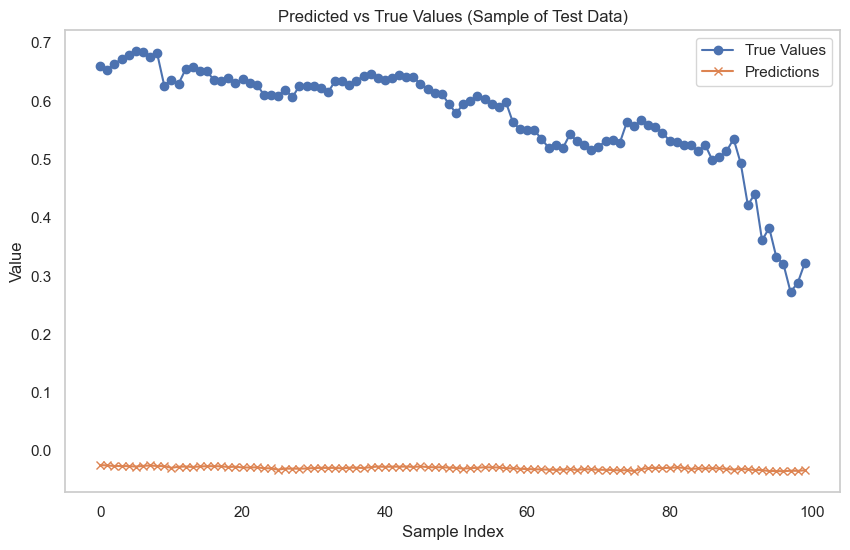

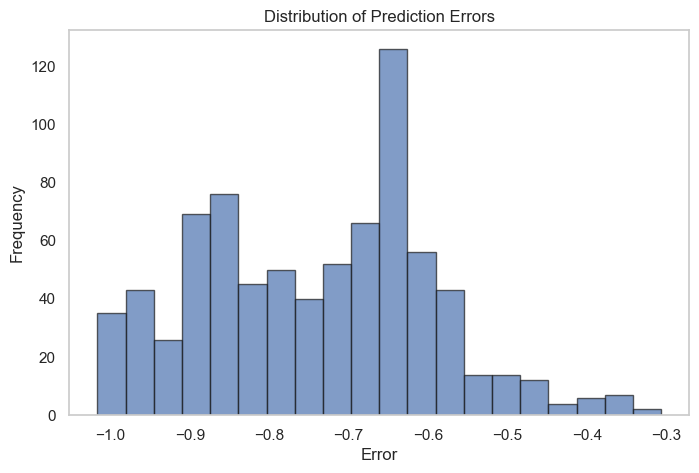

Best GRU Model: Test Loss = 0.5705, MSE = 0.5705, R² = -24.6787


In [92]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Updated GRU model class without BatchNorm and Dropout
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = out[:, -1, :]  # Take output of the last time step
        out = self.fc(out)
        return out

# Load test data
def load_test_data(file_path):
    test_data = np.load(file_path)
    X_test = test_data["X"]
    y_test = test_data["y"]
    return X_test, y_test

# Evaluate the GRU model
def evaluate_gru_model(model_path, X_test, y_test, input_size, hidden_size, output_size):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = GRUModel(input_size, hidden_size, output_size).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
    criterion = nn.MSELoss()
    
    with torch.no_grad():
        predictions = model(X_test_tensor)
        test_loss = criterion(predictions, y_test_tensor).item()
        predictions = predictions.cpu().numpy()
        y_test = y_test_tensor.cpu().numpy()
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
    
    print(f"Test Loss (MSE): {test_loss:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # Visualization: Predicted vs True Values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test[:100], label="True Values", marker='o')
    plt.plot(predictions[:100], label="Predictions", marker='x')
    plt.title("Predicted vs True Values (Sample of Test Data)")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()

    # Visualization: Distribution of Prediction Errors
    errors = predictions - y_test
    plt.figure(figsize=(8, 5))
    plt.hist(errors, bins=20, alpha=0.7, edgecolor='k')
    plt.title("Distribution of Prediction Errors")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()
    
    return test_loss, mse, r2

# Main testing function
if __name__ == "__main__":
    # Ensure test data and model paths are correctly set
    test_data_path = "./data_splits/test_data.npz"  # Path to preprocessed test data
    gru_model_path = "best_stock_predictor_gru.pth"  # Path to the saved GRU model
    
    # Load test data
    X_test, y_test = load_test_data(test_data_path)
    
    # Define model parameters (match parameters from training)
    input_size = X_test.shape[2]
    hidden_size = 32  # Match the best hyperparameters found during tuning
    output_size = 1

    print("Evaluating Best GRU Model...")
    test_loss, mse, r2 = evaluate_gru_model(
        gru_model_path, X_test, y_test, input_size, hidden_size, output_size
    )
    print(f"Best GRU Model: Test Loss = {test_loss:.4f}, MSE = {mse:.4f}, R² = {r2:.4f}")


Evaluating Best LSTM Model...
Test Loss (MSE): 0.5789
Mean Squared Error (MSE): 0.5789
R² Score: -25.0572


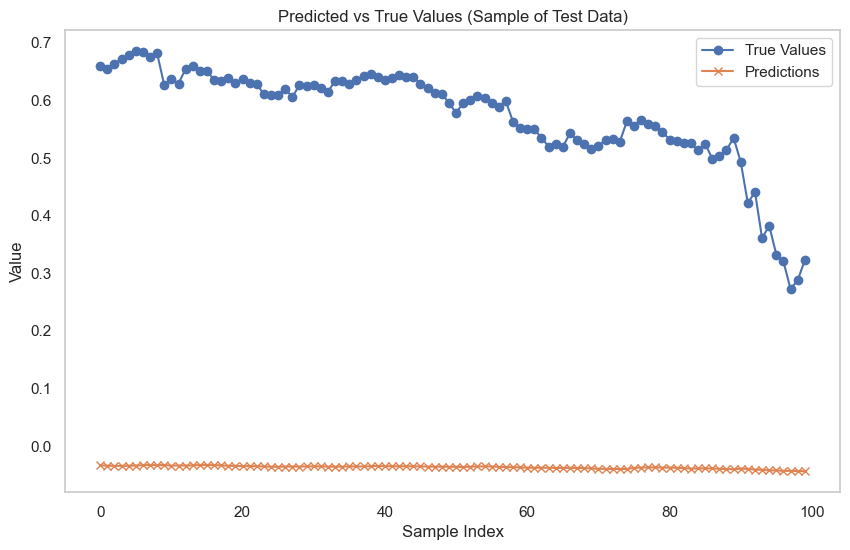

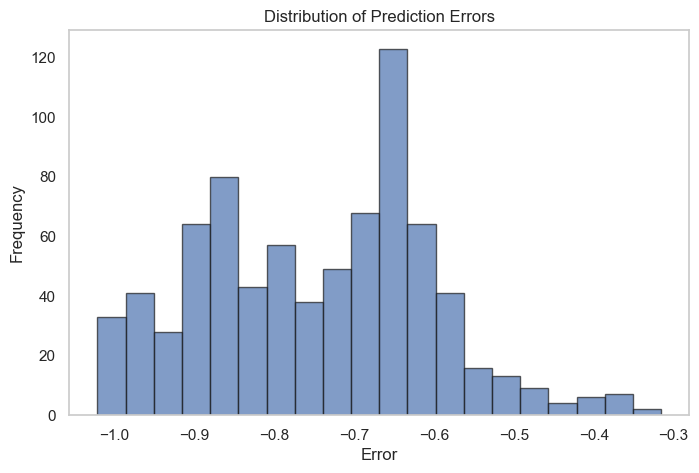

Best LSTM Model: Test Loss = 0.5789, MSE = 0.5789, R² = -25.0572


In [ ]:

import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the LSTM model class
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Use the output from the last time step
        return out

# Load test data
def load_test_data(file_path):
    test_data = np.load(file_path)
    X_test = test_data["X"]
    y_test = test_data["y"]
    return X_test, y_test

# Evaluate the LSTM model
def evaluate_lstm_model(model_path, X_test, y_test, input_size, hidden_size, output_size):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = LSTMModel(input_size, hidden_size, output_size).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
    criterion = nn.MSELoss()
    
    with torch.no_grad():
        predictions = model(X_test_tensor)
        test_loss = criterion(predictions, y_test_tensor).item()
        predictions = predictions.cpu().numpy()
        y_test = y_test_tensor.cpu().numpy()
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
    
    print(f"Test Loss (MSE): {test_loss:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # Visualization: Predicted vs True Values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test[:100], label="True Values", marker='o')
    plt.plot(predictions[:100], label="Predictions", marker='x')
    plt.title("Predicted vs True Values (Sample of Test Data)")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()

    # Visualization: Distribution of Prediction Errors
    errors = predictions - y_test
    plt.figure(figsize=(8, 5))
    plt.hist(errors, bins=20, alpha=0.7, edgecolor='k')
    plt.title("Distribution of Prediction Errors")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()
    
    return test_loss, mse, r2

# Main testing function
if __name__ == "__main__":
    # Ensure test data and model paths are correctly set
    test_data_path = "./data_splits/test_data.npz"  # Path to preprocessed test data
    lstm_model_path = "best_stock_predictor_lstm.pth"  # Path to the saved LSTM model
    
    # Load test data
    X_test, y_test = load_test_data(test_data_path)
    
    # Define model parameters (match parameters from training)
    input_size = X_test.shape[2]
    hidden_size = 128  # Adjusted to match the best parameters
    output_size = 1

    print("Evaluating Best LSTM Model...")
    test_loss, mse, r2 = evaluate_lstm_model(
        lstm_model_path, X_test, y_test, input_size, hidden_size, output_size
    )
    print(f"Best LSTM Model: Test Loss = {test_loss:.4f}, MSE = {mse:.4f}, R² = {r2:.4f}")
